### "Anticipez les besoins en consommation électrique de bâtiments"

URL: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking<br/>
URL: https://openclassrooms.com/fr/projects/629/assignment<br/>
URL: https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what<br/>
URL: https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy<br/>

##### EDA Notebook 

# 0 Import des données

### 0.0 Chargement des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(color_codes=True)
from ast import literal_eval
import scipy.stats as st
from scipy.stats import norm
from sklearn.impute import KNNImputer
%config Completer.use_jedi = False
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

### 0.1 Chargement des 2 datasets

In [2]:
# Loading data
data_raw2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
data_raw2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

In [3]:
data_raw2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
data_raw2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
data_raw2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [6]:
data_raw2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### 1 Colonnes non communes

In [7]:
# supprimer les variables non communes aux 2 datasets

In [8]:
df2015_not_in_df2016 = set(data_raw2015.columns) - set(data_raw2016.columns)
df2016_not_in_df2015 = set(data_raw2016.columns) - set(data_raw2015.columns)
df2015_not_in_df2016

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [9]:
df2016_not_in_df2015

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [10]:
# La colonne 'Comment' de 2015 correspond à la colonne 'Comments' de 2016
# La colonne 'Zip Codes' de 2015 correspond à la colonne 'ZipCode' de 2016
# La colonne 'GHGEmissionsIntensity(kgCO2e/ft2)' de 2015 correspond à la colonne 'GHGEmissionsIntensity' de 2016
# La colonne 'GHGEmissions(MetricTonsCO2e)' de 2015 correspond à la colonne 'TotalGHGEmissions' de 2016

### 1.1 Colonnes de localisation

In [11]:
# Création de nouvelles  variables à partir des données de localisation de data_raw2015


# Nous voyons que certains colonnes spécifiques ont été reformatées.
# du coup, nous applatirons la colonne 'Location' de 2015 qui a été séparée en plusieurs colonnes pour 2016

#    'State'
#    'City'
#    'Address'
#    'Longitude'
#    'Latitude'

In [12]:
# appliquer l'applatissement de "Location"
data_raw2015["Location"] = data_raw2015["Location"].apply(literal_eval)

# extraire les "composants"
data_raw2015["Latitude"] = data_raw2015["Location"].apply(lambda x: x["latitude"])
data_raw2015["Longitude"] = data_raw2015["Location"].apply(lambda x: x["longitude"])
data_raw2015["human_address"] = data_raw2015["Location"].apply(lambda x: x["human_address"])

# appliquer l'applatissement de "human_address"
data_raw2015["human_address"] = data_raw2015["human_address"].apply(literal_eval)

# extraire les "composants"
data_raw2015["Address"] = data_raw2015["human_address"].apply(lambda x: x["address"])
data_raw2015["City"] = data_raw2015["human_address"].apply(lambda x: x["city"])
data_raw2015["State"] = data_raw2015["human_address"].apply(lambda x: x["state"])
data_raw2015["ZipCode"] = data_raw2015["human_address"].apply(lambda x: x["zip"])

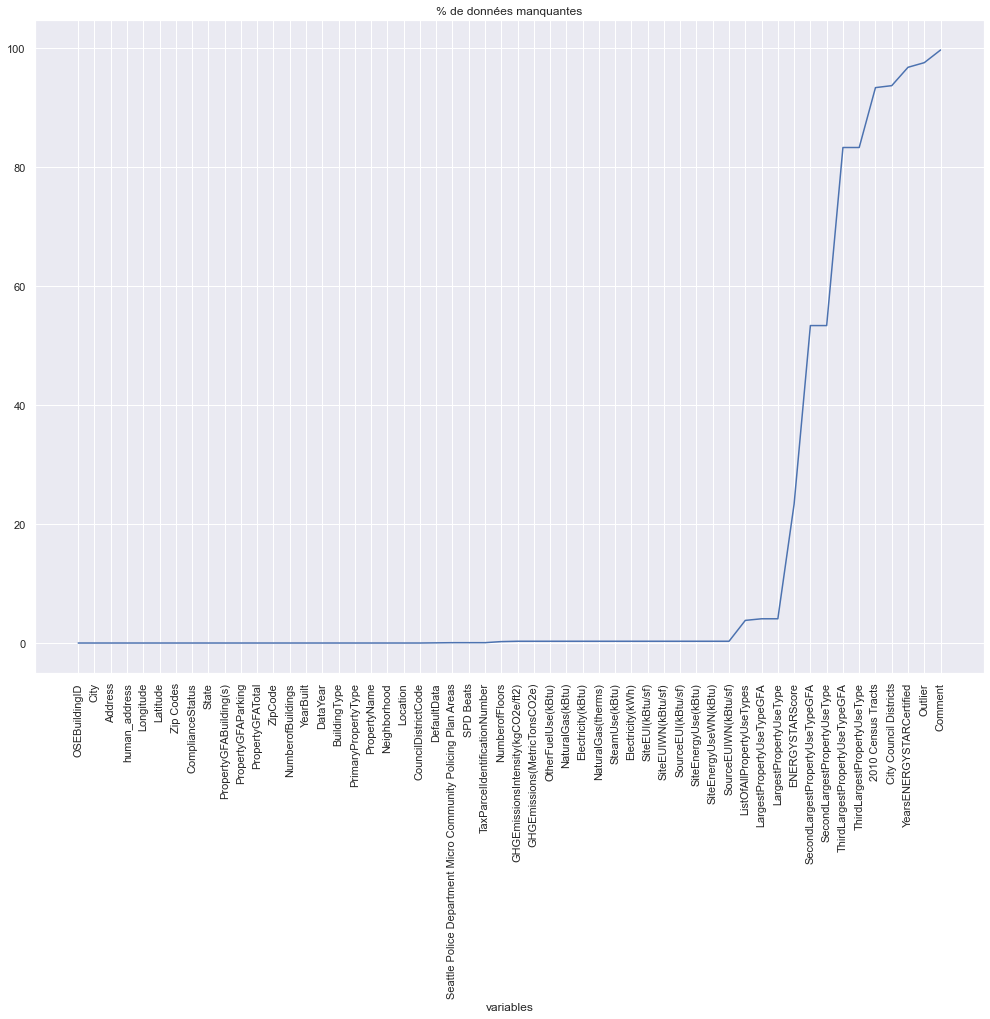

In [13]:
# pourcentage de nan pour chaque colonne de data
df_missing = data_raw2015.isna().sum().sort_values()/len(data_raw2015)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.xlabel('variables')
plt.plot(df_missing)

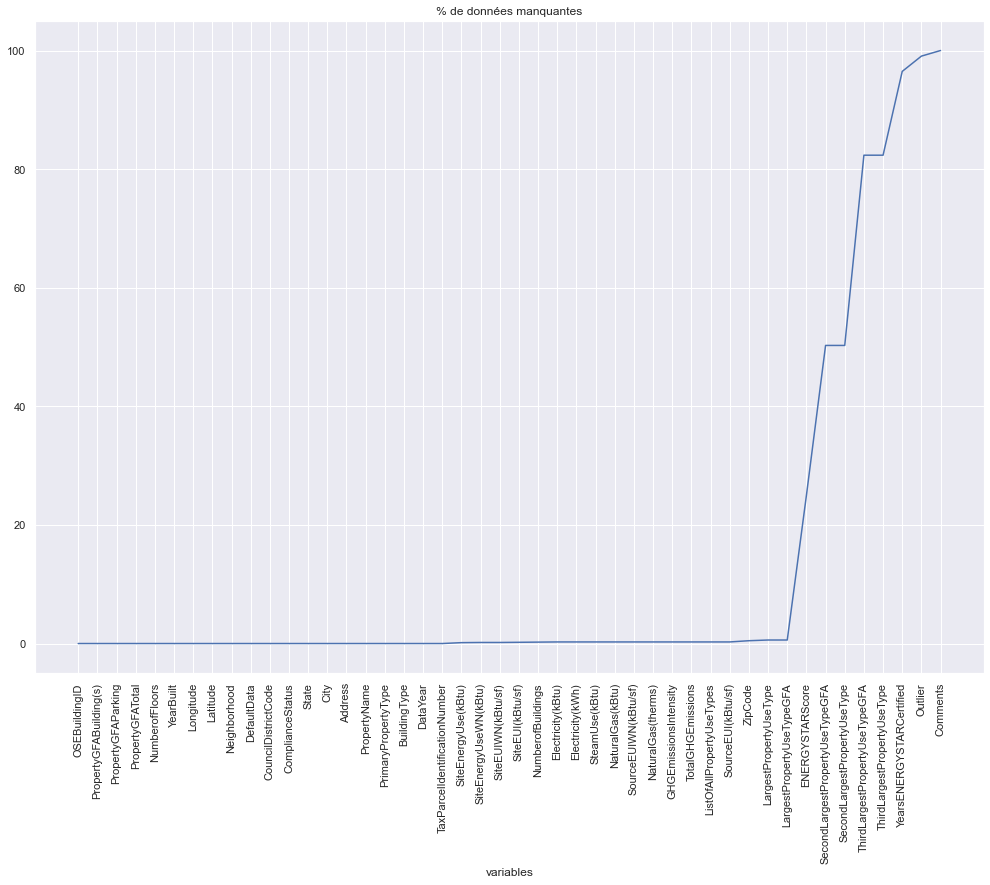

In [14]:
# pourcentage de nan pour chaque colonne de data
df_missing = data_raw2016.isna().sum().sort_values()/len(data_raw2016)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.xlabel('variables')
plt.plot(df_missing)

### 1.1 Renomage et suppression de colonnes

In [15]:
data_raw2016.rename(columns={"Comments": "Comment"}, inplace=True)
#'TotalGHGEmissions' Variable unique dans 2016, similaire à 'GHGEmissions(MetricTonsCO2e)' Variable unique dans 2015
#'GHGEmissionsIntensity(kgCO2e/ft2)' Variable unique dans 2015, similaire à 'GHGEmissionsIntensity' Variable unique dans 2016
data_raw2015.rename(columns={
    "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions",
    "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity"}, inplace=True)

In [16]:
selected_rows = data_raw2015[~data_raw2015['Comment'].isna()]
print(selected_rows['Comment'])

62      Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.                                                                                                           
436     Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.                                                              
437     One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re
595     Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by roofto

In [17]:
selected_rows = data_raw2016[~data_raw2016['Comment'].isna()]
print(selected_rows['Comment'])

Series([], Name: Comment, dtype: float64)


In [18]:
# Supprimer les colones inutiles
data_raw2015.drop(["PropertyName", "City", "State", "TaxParcelIdentificationNumber", "ListOfAllPropertyUseTypes","Comment", "Location", "human_address"], axis=1, inplace=True)
data_raw2016.drop(["PropertyName", "City", "State", "TaxParcelIdentificationNumber", "ListOfAllPropertyUseTypes","Comment"], axis=1, inplace=True)

In [19]:
data_raw2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,98101
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,98101
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,98101
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,98101
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,98121


In [20]:
data_raw2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88


In [21]:
df2015_not_in_df2016 = set(data_raw2015.columns) - set(data_raw2016.columns)
df2016_not_in_df2015 = set(data_raw2016.columns) - set(data_raw2015.columns)
df2015_not_in_df2016

{'2010 Census Tracts',
 'City Council Districts',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [22]:
df2016_not_in_df2015

set()

In [23]:
data_raw2015.drop((df2015_not_in_df2016), axis=1, inplace=True)

In [24]:
data_raw2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,98101
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,98101
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,98101
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,98101
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,98121


In [25]:
data_raw2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88


In [26]:
pd.DataFrame([data_raw2015.dtypes, data_raw2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,ZipCode
0,int64,int64,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object
1,int64,int64,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,float64


In [27]:
data_raw2015['DefaultData'] = data_raw2015['DefaultData'].replace({'Yes' : True, 'No' : False})
data_raw2015[['DefaultData']] = data_raw2015[['DefaultData']].astype('bool')
data_raw2015[['Latitude','Longitude', 'ZipCode']] = data_raw2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

In [28]:
pd.DataFrame([data_raw2015.dtypes, data_raw2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,ZipCode
0,int64,int64,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,float64
1,int64,int64,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,float64


In [29]:
data_raw2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,False,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,98101.0
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,False,Compliant,NaN,47.613106,-122.333358,724 PINE ST,98101.0
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,True,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,98101.0
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,False,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,98101.0
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,False,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,98121.0


In [30]:
data_raw2015.shape

(3340, 40)

In [31]:
data_raw2016.shape

(3376, 40)

In [32]:
# pourcentage total de valeur manquante sur le dataset brute data_raw2015
df_raw1=((data_raw2015.isna().sum().sort_values(ascending=False)/3340*100).sum()/45)
print(f'Il y a {round(df_raw1,1)}% de valeurs manquantes dans le dataset brute.')

Il y a 11.2% de valeurs manquantes dans le dataset brute.


In [33]:
# pourcentage total de valeur manquante sur le dataset brute data_raw2016
df_raw1=((data_raw2016.isna().sum().sort_values(ascending=False)/3376*100).sum()/45)
print(f'Il y a {round(df_raw1,1)}% de valeurs manquantes dans le dataset brute.')

Il y a 10.9% de valeurs manquantes dans le dataset brute.


### 1.2 Identification des batiments uniques à chaque datasets

In [34]:
# Forme du dataset
print(data_raw2015.shape)

# Nombre d'indexes uniques du dataset data_raw2015
print(len(list(data_raw2015.index.values)))

(3340, 40)
3340


In [35]:
# Forme du dataset
print(data_raw2016.shape)

# Nombre d'indexes uniques du dataset data_raw2016
print(len(list(data_raw2016.index.values)))

(3376, 40)
3376


In [36]:
# Listes des indexes
list_index_2015 = list(data_raw2015.index.values)
list_index_2016 = list(data_raw2016.index.values)
list_index_non_commun = set(list_index_2016) - set(list_index_2015)
print("Il y a {} bâtiments non communs à 2016 et 2015".format(len(list_index_non_commun)))

Il y a 36 bâtiments non communs à 2016 et 2015


In [37]:
# Nombre d'individus de data_raw2016 absents de data_raw2015
list_index_non_2015 = [ind for ind in list_index_2016 if ind not in list_index_2015]
len(list_index_non_2015)

36

In [38]:
data_raw2015.index.nunique()

3340

In [39]:
data_raw2016.index.nunique()

3376

In [40]:
data_raw2015.nunique()

OSEBuildingID                      3340
DataYear                           1   
BuildingType                       7   
PrimaryPropertyType                27  
CouncilDistrictCode                7   
Neighborhood                       13  
YearBuilt                          113 
NumberofBuildings                  10  
NumberofFloors                     50  
PropertyGFATotal                   3150
PropertyGFAParking                 908 
PropertyGFABuilding(s)             3145
LargestPropertyUseType             56  
LargestPropertyUseTypeGFA          2979
SecondLargestPropertyUseType       47  
SecondLargestPropertyUseTypeGFA    1270
ThirdLargestPropertyUseType        41  
ThirdLargestPropertyUseTypeGFA     474 
YearsENERGYSTARCertified           61  
ENERGYSTARScore                    100 
SiteEUI(kBtu/sf)                   1072
SiteEUIWN(kBtu/sf)                 1115
SourceEUI(kBtu/sf)                 1673
SourceEUIWN(kBtu/sf)               1687
SiteEnergyUse(kBtu)                3326


In [41]:
data_raw2016.nunique()

OSEBuildingID                      3376
DataYear                           1   
BuildingType                       8   
PrimaryPropertyType                24  
Address                            3354
ZipCode                            55  
CouncilDistrictCode                7   
Neighborhood                       19  
Latitude                           2876
Longitude                          2656
YearBuilt                          113 
NumberofBuildings                  17  
NumberofFloors                     50  
PropertyGFATotal                   3195
PropertyGFAParking                 496 
PropertyGFABuilding(s)             3193
LargestPropertyUseType             56  
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType       50  
SecondLargestPropertyUseTypeGFA    1352
ThirdLargestPropertyUseType        44  
ThirdLargestPropertyUseTypeGFA     501 
YearsENERGYSTARCertified           65  
ENERGYSTARScore                    100 
SiteEUI(kBtu/sf)                   1085


In [42]:
data_raw2015['ENERGYSTARScore'].fillna(data_raw2016['ENERGYSTARScore'], inplace=True)

In [43]:
data_raw2016['ENERGYSTARScore'].fillna(data_raw2015['ENERGYSTARScore'], inplace=True)

In [44]:
data_raw2015['SecondLargestPropertyUseTypeGFA'].fillna(data_raw2016['SecondLargestPropertyUseTypeGFA'], inplace=True)

In [45]:
data_raw2016['SecondLargestPropertyUseTypeGFA'].fillna(data_raw2015['SecondLargestPropertyUseTypeGFA'], inplace=True)

In [46]:
data_raw2015['SecondLargestPropertyUseType'].fillna(data_raw2016['SecondLargestPropertyUseType'], inplace=True)

In [47]:
data_raw2016['SecondLargestPropertyUseType'].fillna(data_raw2015['SecondLargestPropertyUseType'], inplace=True)

In [48]:
data = pd.concat([data_raw2015, data_raw2016], axis=0, sort=False)

In [49]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,False,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,98101.0
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,False,Compliant,NaN,47.613106,-122.333358,724 PINE ST,98101.0
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,True,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,98101.0
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,1936.34,31.38,False,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,98101.0
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,507.70,4.02,False,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,Error - Correct Default Data,NaN,47.567220,-122.311540,1600 S Dakota St,NaN
3372,50223,2016,Nonresidential COS,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,Compliant,NaN,47.596250,-122.322830,719 8th Ave S,NaN
3373,50224,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,False,Compliant,NaN,47.636440,-122.357840,1920 1st Ave W,NaN
3374,50225,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,False,Compliant,NaN,47.528320,-122.324310,8319 8th Ave S,NaN


In [50]:
# Nombre d'indexes uniques
print("Le nombre de bâtiments uniques est de : {}".format(len(set(list(data.index.values)))))

Le nombre de bâtiments uniques est de : 3376


In [51]:
data.nunique()

OSEBuildingID                      3432
DataYear                           2   
BuildingType                       8   
PrimaryPropertyType                32  
CouncilDistrictCode                7   
Neighborhood                       19  
YearBuilt                          113 
NumberofBuildings                  18  
NumberofFloors                     50  
PropertyGFATotal                   3297
PropertyGFAParking                 960 
PropertyGFABuilding(s)             3726
LargestPropertyUseType             57  
LargestPropertyUseTypeGFA          3332
SecondLargestPropertyUseType       50  
SecondLargestPropertyUseTypeGFA    1434
ThirdLargestPropertyUseType        45  
ThirdLargestPropertyUseTypeGFA     531 
YearsENERGYSTARCertified           116 
ENERGYSTARScore                    100 
SiteEUI(kBtu/sf)                   2020
SiteEUIWN(kBtu/sf)                 2065
SourceEUI(kBtu/sf)                 3137
SourceEUIWN(kBtu/sf)               3191
SiteEnergyUse(kBtu)                6679


### 1.3 Suppression des lignes et colonnes avec trop de Nan, features initules et feature trop correlées

In [52]:
# Suppression des lignes contenant uniquement des valeurs nulles
data.dropna(axis=0, inplace=True, how='all')
# Suppression des lignes doublons
data.drop_duplicates(inplace=True)

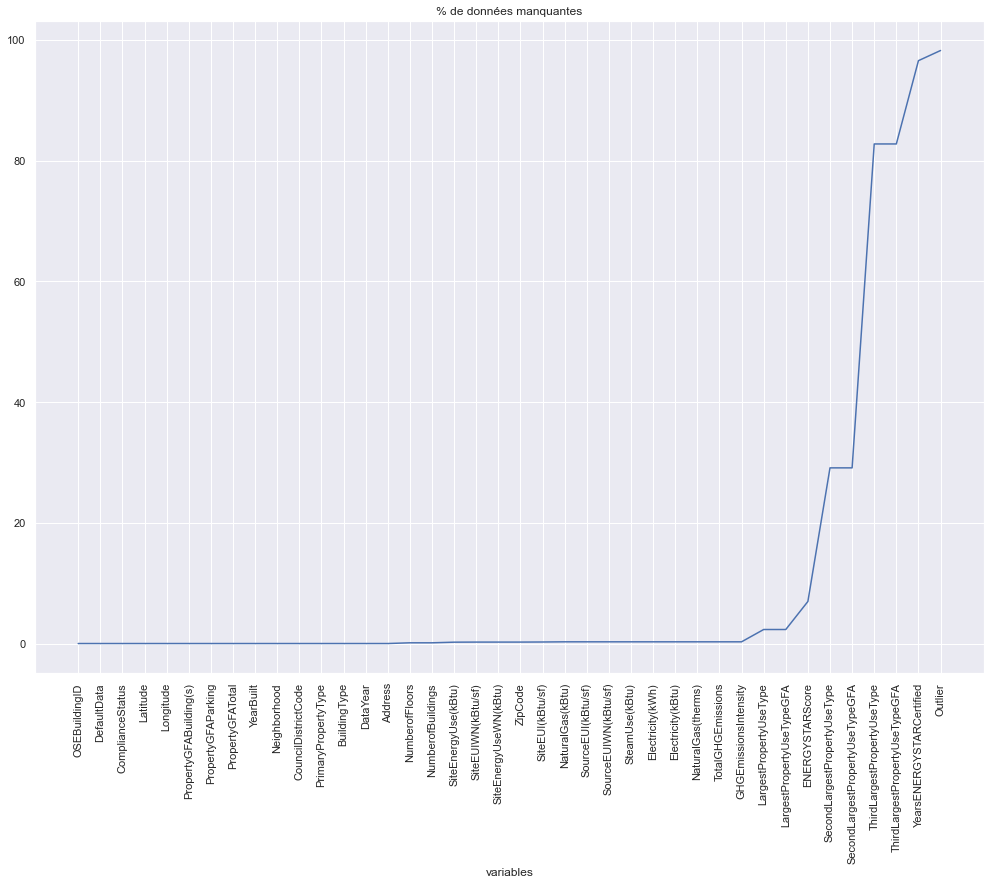

In [53]:
# pourcentage de nan pour chaque colonne de data
df_missing = data.isna().sum().sort_values()/len(data)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.xlabel('variables')
plt.plot(df_missing)

In [54]:
# Nous allons supprimer les colonnes >80% NaN et 100% Nan
# data = data.loc[:, data.isnull().mean() < .8]
data = data.loc[:, data.isnull().sum() < 0.8*data.shape[0]]

In [55]:
df_missing = data.isna().sum().sort_values()/len(data)*100
df_missing

OSEBuildingID                      0.000000 
DefaultData                        0.000000 
ComplianceStatus                   0.000000 
Latitude                           0.000000 
Longitude                          0.000000 
PropertyGFABuilding(s)             0.000000 
PropertyGFAParking                 0.000000 
Address                            0.000000 
PropertyGFATotal                   0.000000 
YearBuilt                          0.000000 
Neighborhood                       0.000000 
CouncilDistrictCode                0.000000 
PrimaryPropertyType                0.000000 
BuildingType                       0.000000 
DataYear                           0.000000 
NumberofBuildings                  0.119119 
NumberofFloors                     0.119119 
SiteEnergyUse(kBtu)                0.223347 
SiteEnergyUseWN(kBtu)              0.238237 
ZipCode                            0.238237 
SiteEUIWN(kBtu/sf)                 0.238237 
SiteEUI(kBtu/sf)                   0.253127 
SourceEUIW

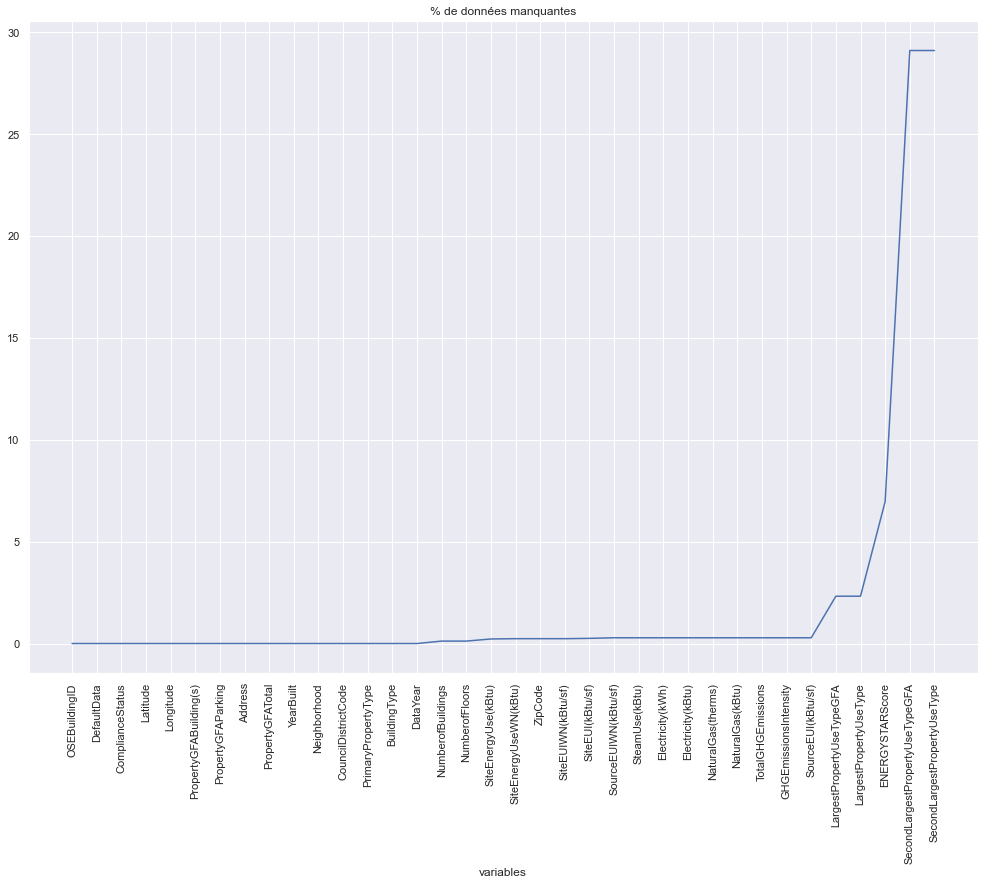

In [56]:
# pourcentage de nan pour chaque colonne de data
df_missing = data.isna().sum().sort_values()/len(data)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.xlabel('variables')
plt.plot(df_missing)

### 1.4 Features correlées à supprimer

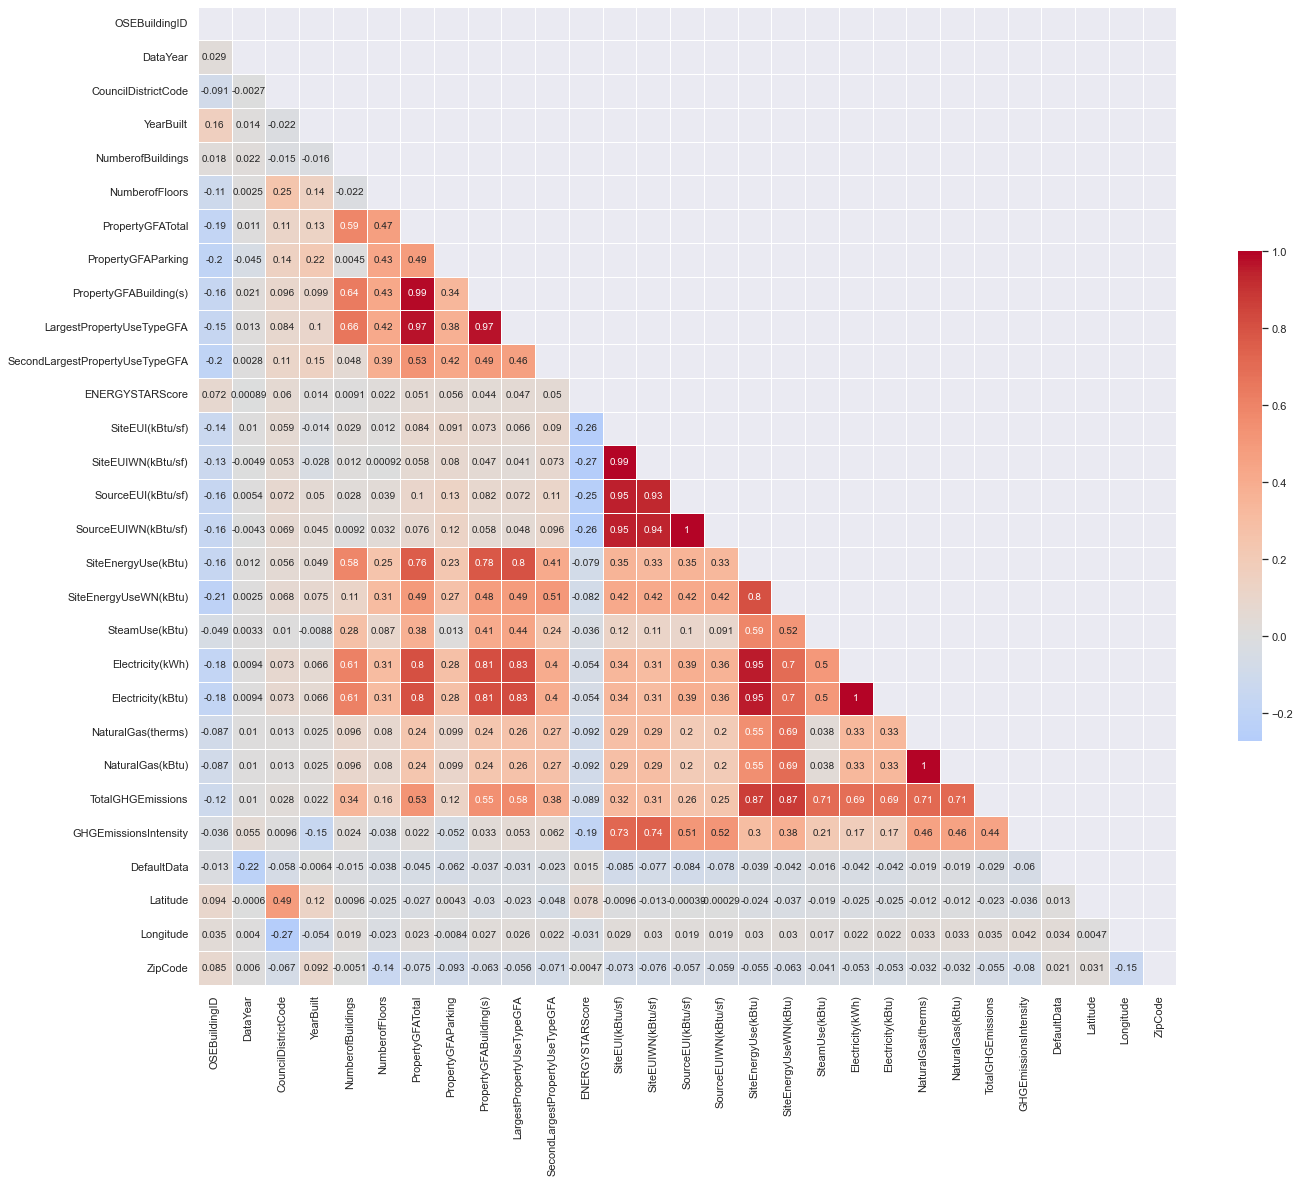

In [57]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [58]:
# Supprimer les colones non selectionnées et trop corrélés
to_drop = ["SiteEUIWN(kBtu/sf)",
"SourceEUI(kBtu/sf)",
"SourceEUIWN(kBtu/sf)",
"SourceEUI(kBtu/sf)",
"SourceEUIWN(kBtu/sf)",
"PropertyGFATotal",
"SiteEnergyUseWN(kBtu)",
"Electricity(kWh)",
"NaturalGas(therms)",
"GHGEmissionsIntensity",
"SiteEUI(kBtu/sf)",
"Electricity(kBtu)",
"SteamUse(kBtu)",
"NaturalGas(kBtu)"]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   CouncilDistrictCode              6716 non-null   int64  
 5   Neighborhood                     6716 non-null   object 
 6   YearBuilt                        6716 non-null   int64  
 7   NumberofBuildings                6708 non-null   float64
 8   NumberofFloors                   6708 non-null   float64
 9   PropertyGFATotal                 6716 non-null   int64  
 10  PropertyGFAParking               6716 non-null   int64  
 11  PropertyGFABuilding(s)           6716 non-null   int64  
 12  LargestPropertyUseTy

In [60]:
data.drop(to_drop, axis=1, inplace=True)

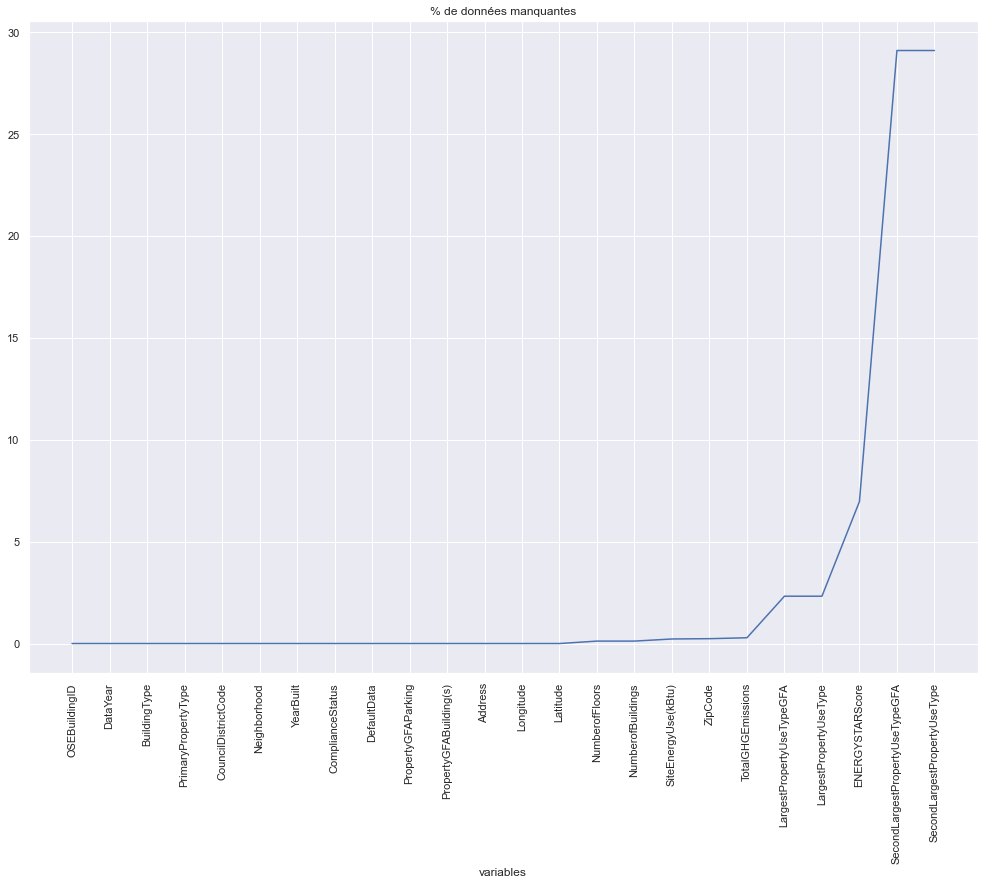

In [61]:
# pourcentage de nan pour chaque colonne de data
df_missing = data.isna().sum().sort_values()/len(data)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% de données manquantes')
plt.xlabel('variables')
plt.plot(df_missing)

In [62]:
pd.DataFrame(data.isna().sum() / len(data)).sort_values(by=0, ascending=False)

,0
SecondLargestPropertyUseTypeGFA,0.291096
SecondLargestPropertyUseType,0.291096
ENERGYSTARScore,0.069684
LargestPropertyUseTypeGFA,0.023228
LargestPropertyUseType,0.023228
TotalGHGEmissions,0.002829
ZipCode,0.002382
SiteEnergyUse(kBtu),0.002233
NumberofBuildings,0.001191
NumberofFloors,0.001191


In [63]:
# Vérification des ID
data['OSEBuildingID'].value_counts().head()

1        2
24752    2
24716    2
24717    2
24720    2
Name: OSEBuildingID, dtype: int64

In [64]:
data.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').tail(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Address,ZipCode
3327,50049,2016,Multifamily LR (1-4),Low-Rise Multifamily,2,DOWNTOWN,2000,1.0,4.0,0,44650,Multifamily Housing,44650.0,Parking,25194.0,58.0,1.248599e+06,8.70,False,Compliant,47.599800,-122.320340,321 10TH AVE S,98104.0
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,2,DOWNTOWN,2000,1.0,4.0,0,44650,Multifamily Housing,44650.0,Parking,20754.0,71.0,1.142949e+06,7.97,False,Compliant,47.599503,-122.320343,321 10TH AVE S,98104.0
3330,50055,2016,Multifamily MR (5-9),Mid-Rise Multifamily,4,NORTHEAST,2014,2.0,7.0,0,42393,Multifamily Housing,31748.0,Parking,60000.0,96.0,1.625696e+06,31.46,False,Compliant,47.657560,-122.315840,4123 12th Ave NE,98105.0
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,4,NORTHEAST,2014,1.0,7.0,0,42393,Multifamily Housing,31748.0,Retail Store,6340.0,98.0,1.543282e+06,30.69,False,Compliant,47.657525,-122.316016,4123 12TH AVE NE,98105.0
3333,50057,2016,Multifamily HR (10+),High-Rise Multifamily,7,DOWNTOWN,2015,1.0,40.0,41915,277566,Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,85.0,1.540416e+07,395.26,False,Compliant,47.616520,-122.337350,2030 8th Ave,98121.0
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,7,DOWNTOWN,2015,1.0,40.0,41915,277566,NaN,NaN,Parking,41539.0,79.0,1.683441e+07,627.97,False,Compliant,47.616498,-122.337708,2030 8TH AVE,98121.0
3334,50058,2016,Multifamily LR (1-4),Low-Rise Multifamily,4,NORTHEAST,1981,1.0,3.0,0,48230,Multifamily Housing,26175.0,Parking,16425.0,80.0,7.833457e+05,5.46,False,Compliant,47.684370,-122.287060,3801 NE 77th St,98115.0
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,4,NORTHEAST,1981,1.0,3.0,0,48230,Multifamily Housing,22310.0,NaN,NaN,44.0,7.770640e+05,5.42,False,Compliant,47.683970,-122.287409,3801 NE 77TH ST,98115.0
3339,50059,2015,Multifamily LR (1-4),Low-Rise Multifamily,4,NORTHEAST,1981,1.0,4.0,0,53100,Multifamily Housing,25265.0,NaN,NaN,24.0,9.663760e+05,6.74,False,Compliant,47.683970,-122.287409,7540 37TH AVE NE,98115.0
3335,50059,2016,Multifamily LR (1-4),Low-Rise Multifamily,4,NORTHEAST,1981,1.0,4.0,0,53100,Multifamily Housing,32007.0,Parking,20754.0,70.0,9.668121e+05,6.74,False,Compliant,47.684300,-122.287720,7540 37th St,98115.0


In [65]:
pd.DataFrame(data.isna().sum() / len(data)).sort_values(by=0, ascending=False)

,0
SecondLargestPropertyUseTypeGFA,0.291096
SecondLargestPropertyUseType,0.291096
ENERGYSTARScore,0.069684
LargestPropertyUseTypeGFA,0.023228
LargestPropertyUseType,0.023228
TotalGHGEmissions,0.002829
ZipCode,0.002382
SiteEnergyUse(kBtu),0.002233
NumberofBuildings,0.001191
NumberofFloors,0.001191


In [66]:
data['CouncilDistrictCode'].value_counts()

7    2074
3    1180
2    1016
4    711 
5    681 
1    562 
6    492 
Name: CouncilDistrictCode, dtype: int64

In [67]:
# Select columns of object dtypes
#obj_columns = list(data.select_dtypes(include='object').columns)

# Convert object dtypes features as categorical data ('category' dtypes)
#data[obj_columns] = data[obj_columns].astype('category')

In [68]:
# pourcentage total de valeur manquante sur le dataset final data
df_data=((data.isna().sum().sort_values(ascending=False)/3340*100).sum()/45)
print(f'Il y a {round(df_data,1)}% de valeurs manquantes dans le dataset brute.')

Il y a 3.2% de valeurs manquantes dans le dataset brute.


In [69]:
data.shape

(6716, 24)

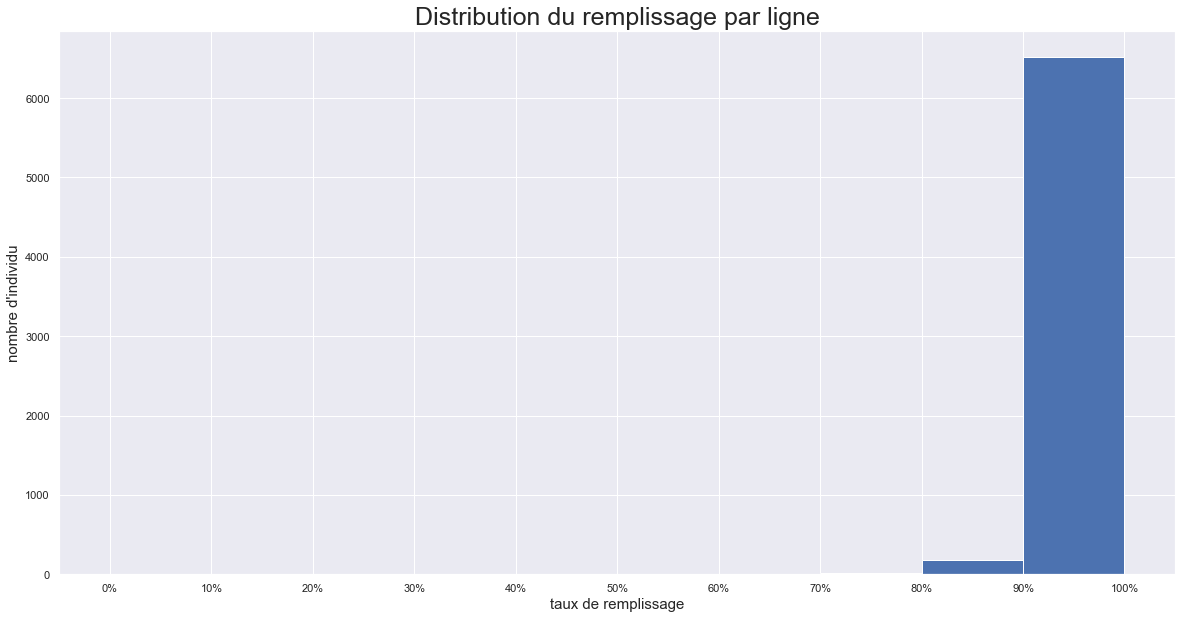

In [70]:
# compter les valeurs présentes pour chaque individus
row_count = data.count(axis=1)

# calculer le taux de remplissage
nb_columns = data.shape[1]
filling_rates_row = row_count / nb_columns

# Histogramme
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Distribution du remplissage par ligne", fontsize=25)
plt.xlabel("taux de remplissage", fontsize=15)
plt.ylabel("nombre d'individu", fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
bins = np.linspace(0, 1, num=11)
ax.hist(filling_rates_row, bins=bins)
ax.xaxis.set_major_locator(plt.MaxNLocator(11))
plt.show()

In [71]:
pd.DataFrame(data.isna().sum() / len(data)*100).sort_values(by=0, ascending=False)

,0
SecondLargestPropertyUseTypeGFA,29.109589
SecondLargestPropertyUseType,29.109589
ENERGYSTARScore,6.968434
LargestPropertyUseTypeGFA,2.322811
LargestPropertyUseType,2.322811
TotalGHGEmissions,0.282906
ZipCode,0.238237
SiteEnergyUse(kBtu),0.223347
NumberofBuildings,0.119119
NumberofFloors,0.119119


### 1.5 Analyses univariées

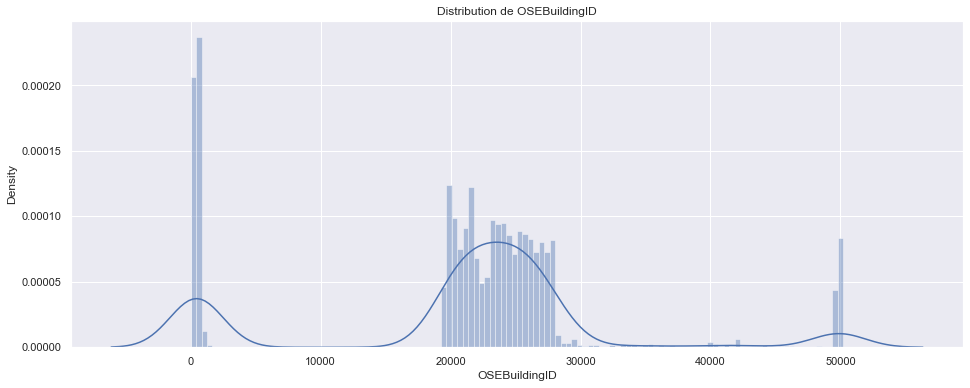

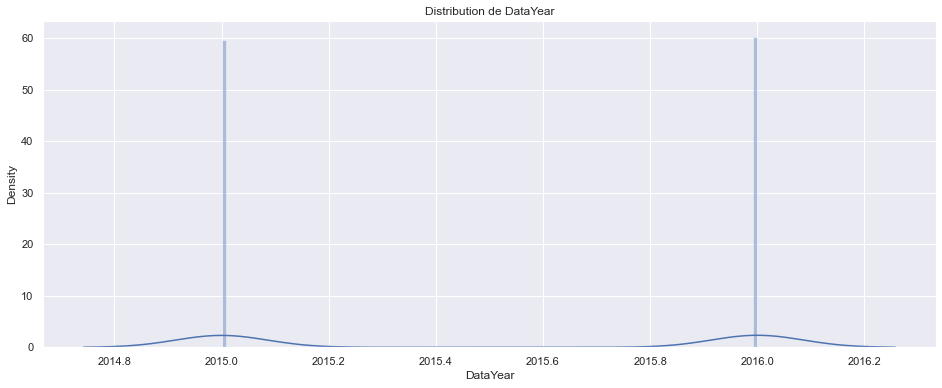

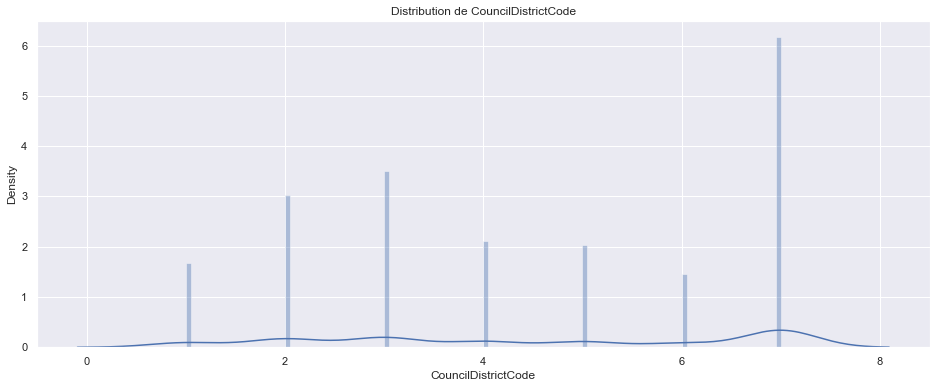

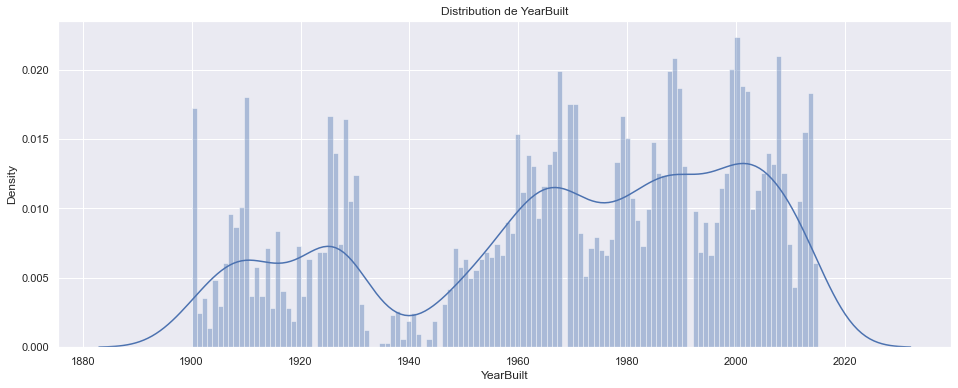

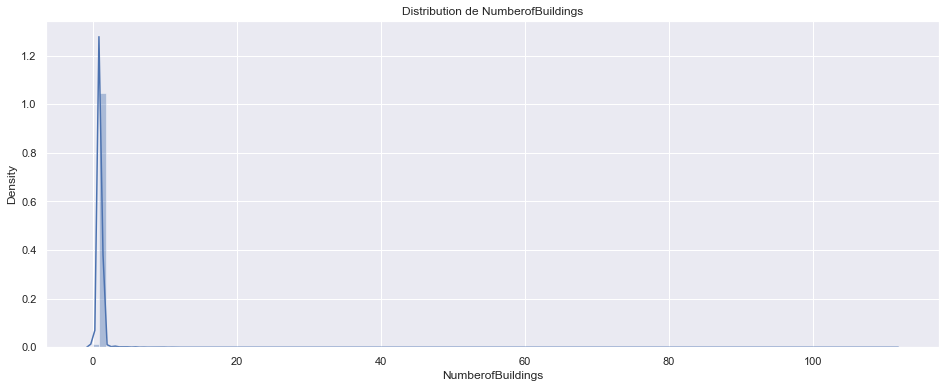

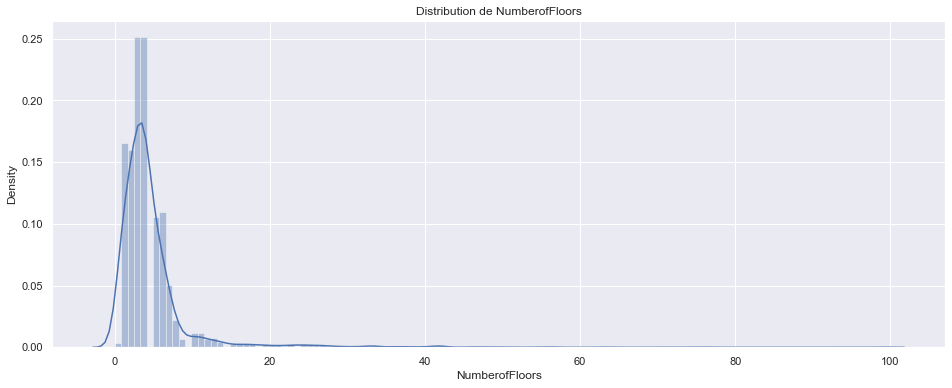

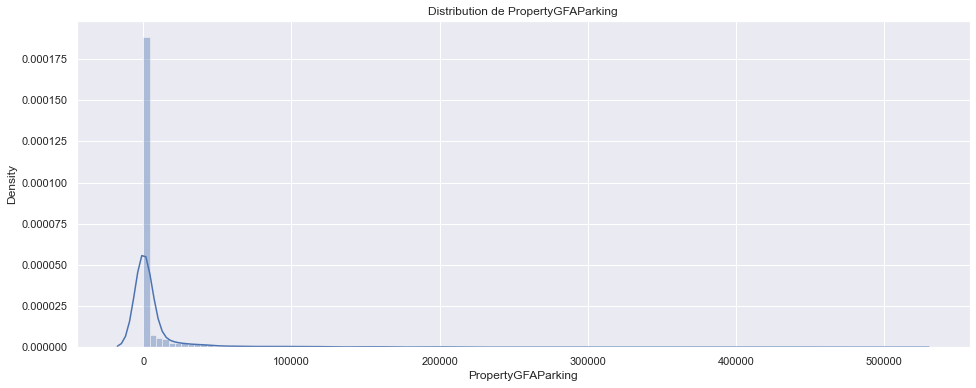

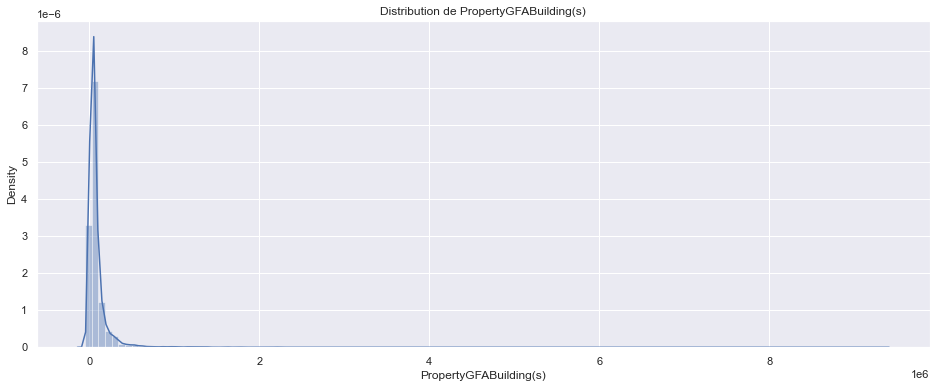

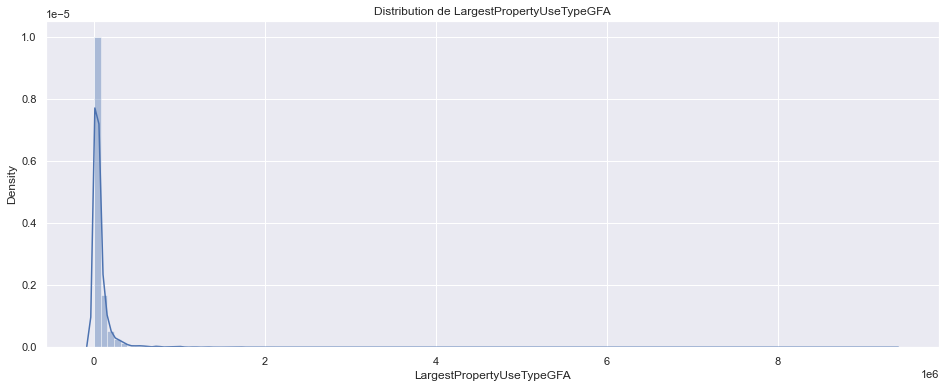

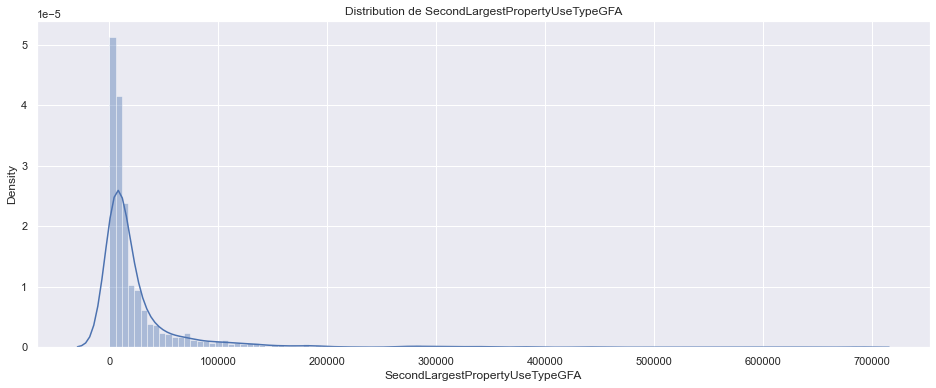

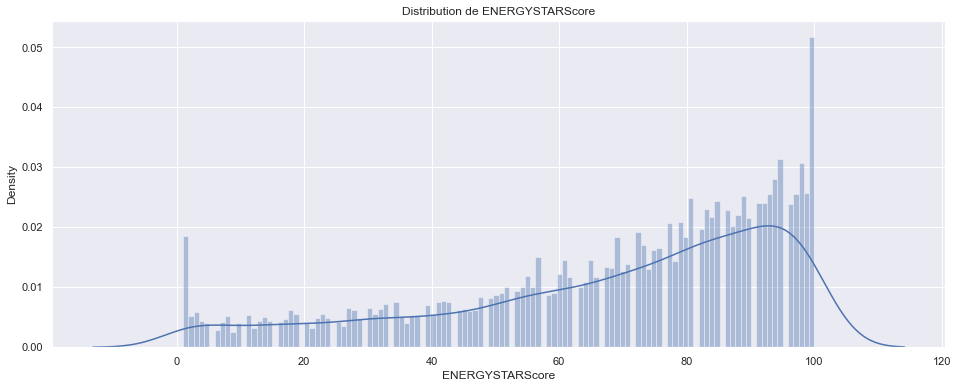

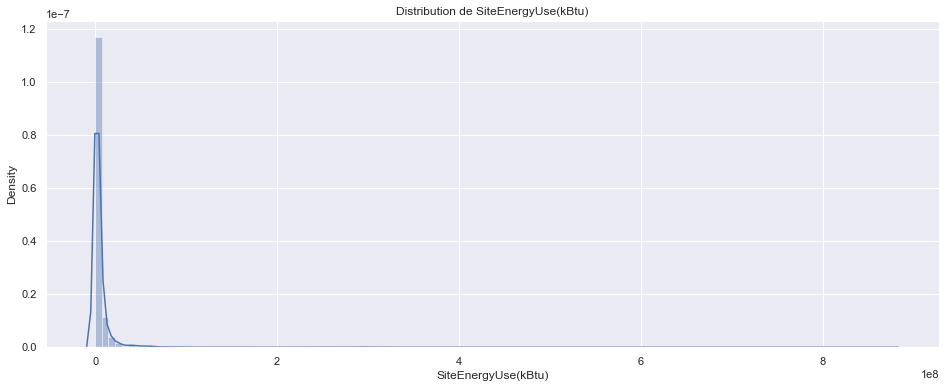

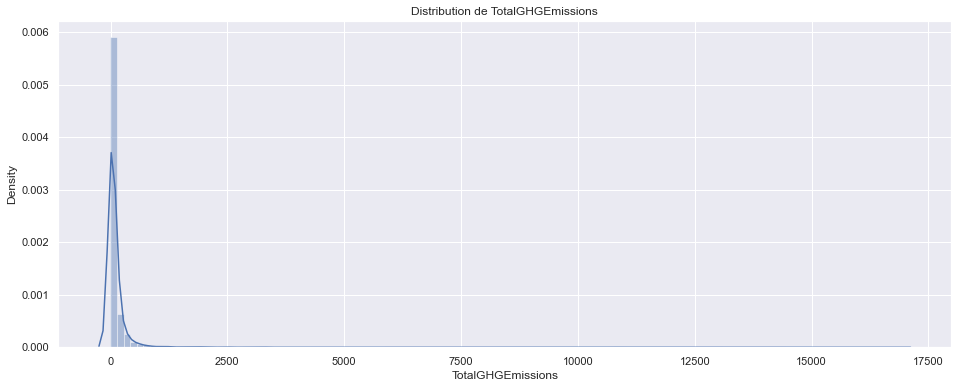

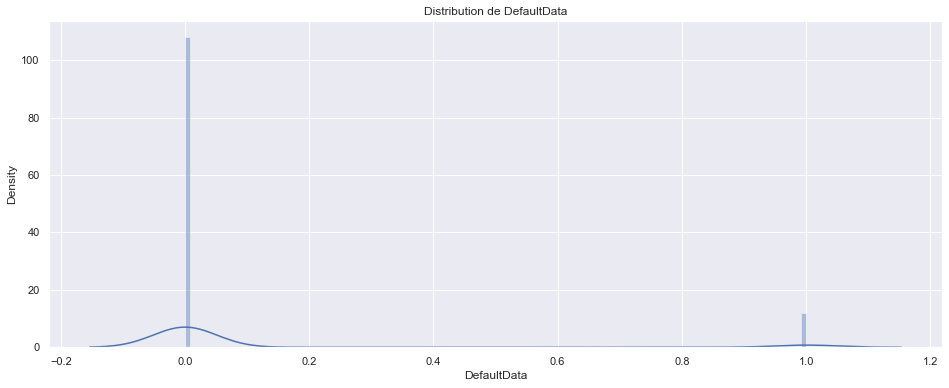

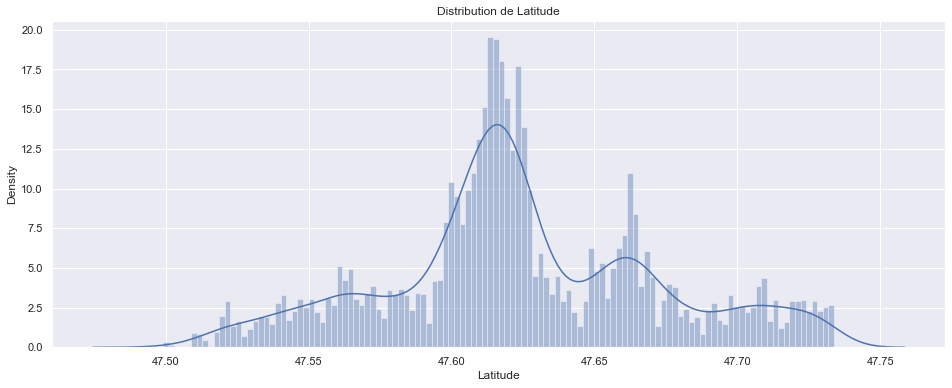

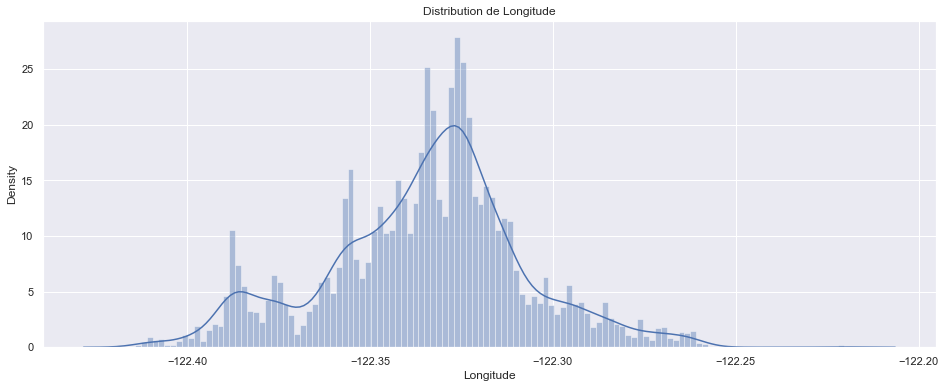

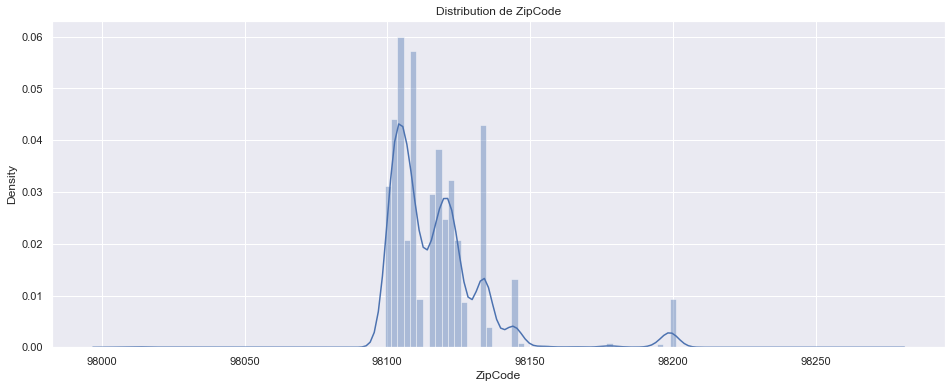

In [72]:
for column in data.select_dtypes(['number', 'bool', 'float64', 'int64']).columns:
    plt.figure(figsize=(16,6))
    plt.title('Distribution de ' + column)
    sns.distplot(data[column].dropna(), bins=120)
    ax.autoscale()
    plt.show()

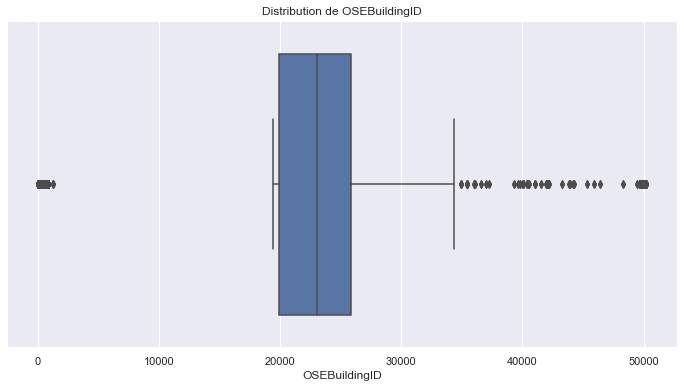

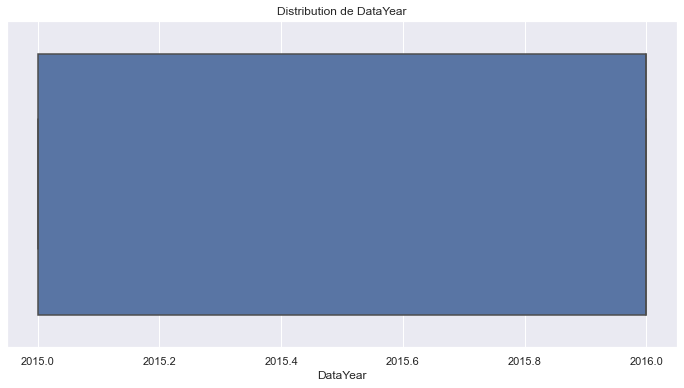

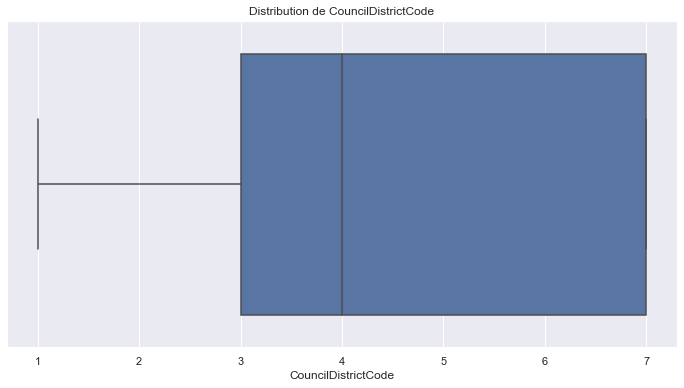

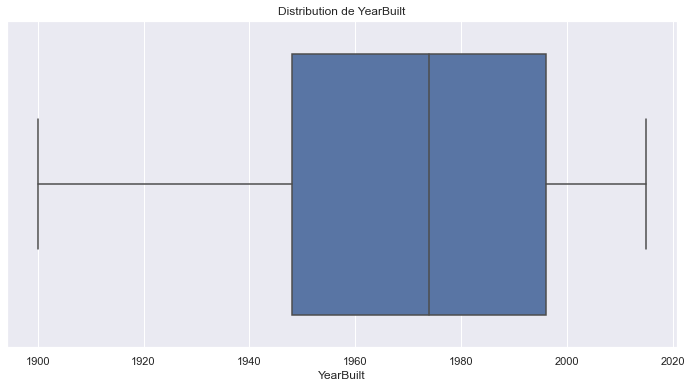

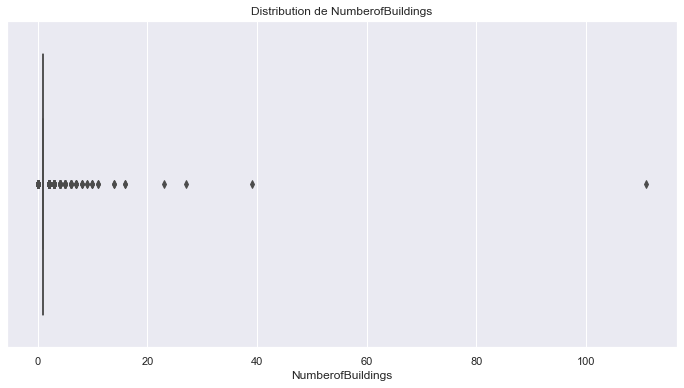

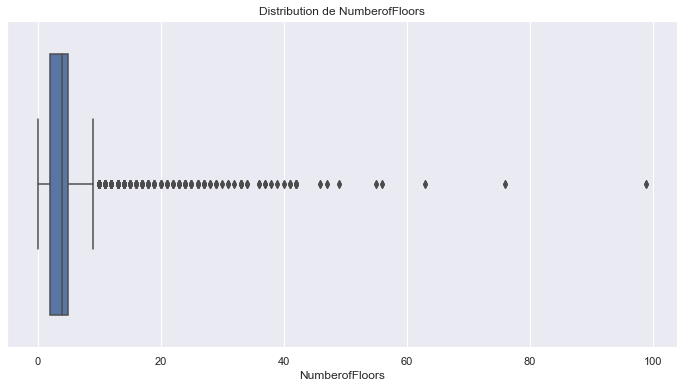

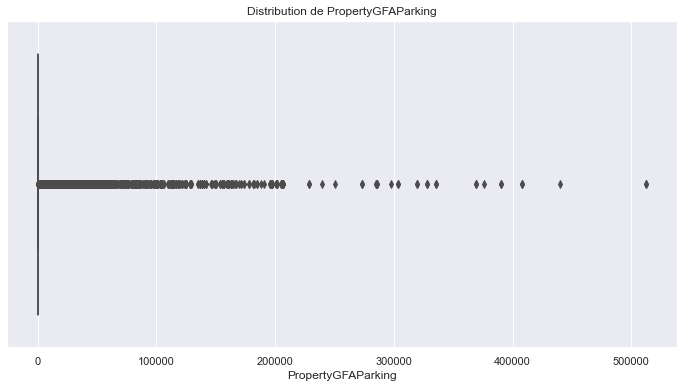

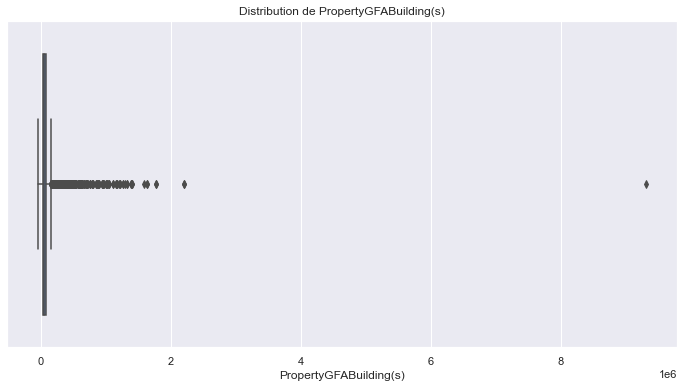

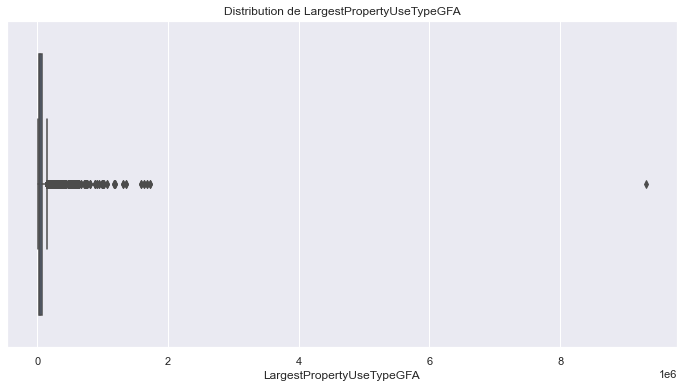

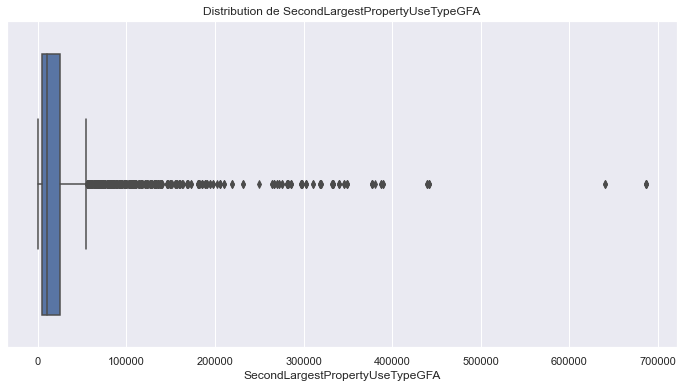

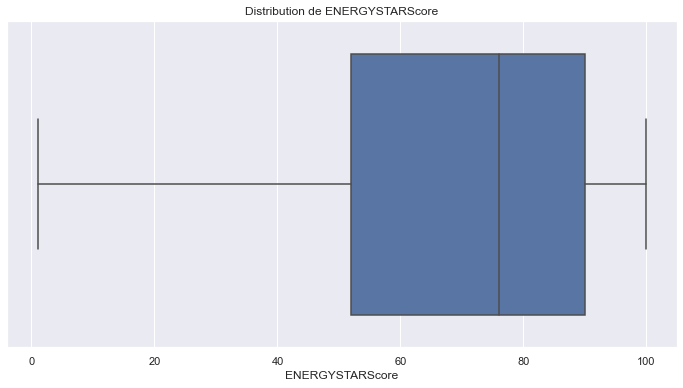

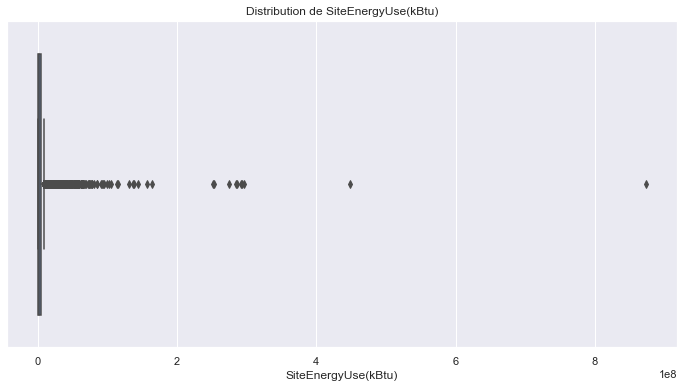

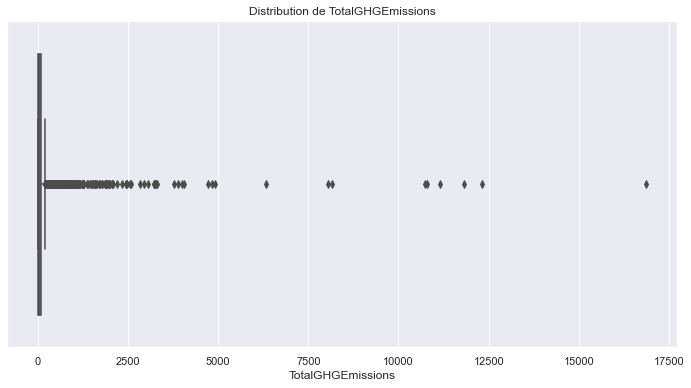

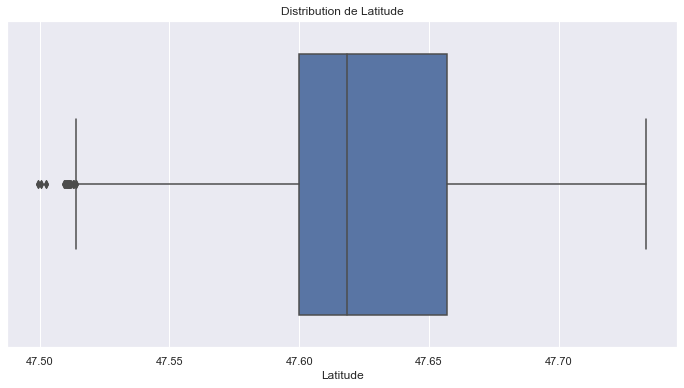

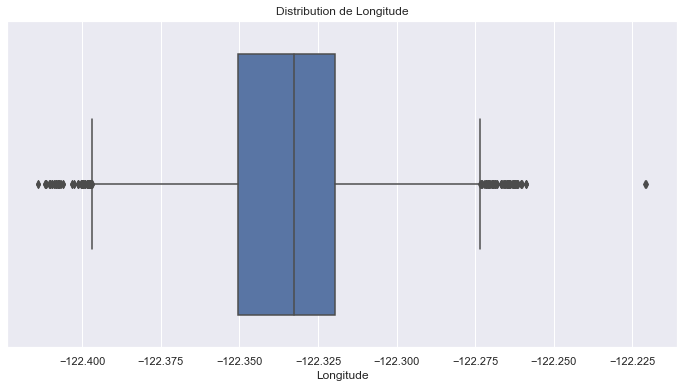

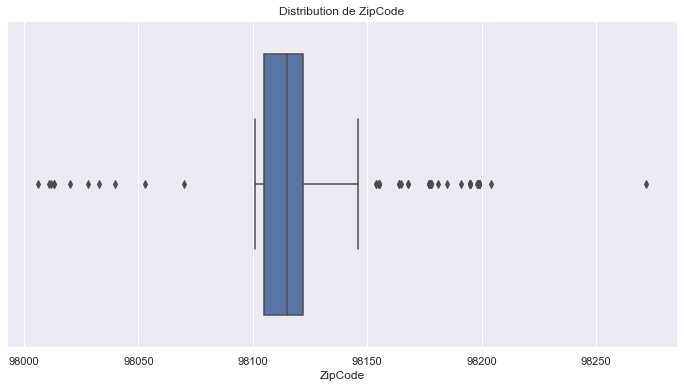

In [73]:
for column in data.select_dtypes(['number', 'float64', 'int64']).columns:
    plt.figure(figsize=(12,6))
    plt.title('Distribution de ' + column)
    sns.boxplot(data[column].dropna())

In [74]:
def cat_data(df, feature, x, y, figsize=(8,5), rotation="45", palette=None, order=None):
    
    data = (pd.DataFrame(df[feature].value_counts())
                .reset_index()
                .rename(columns={'index': x, feature: y}))
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=data, palette=palette, order=order);
    plt.xticks(rotation=rotation)
    plt.show()

In [75]:
cat_columns = data.select_dtypes(include=['object']).columns
cat_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ComplianceStatus', 'Address'],
      dtype='object')

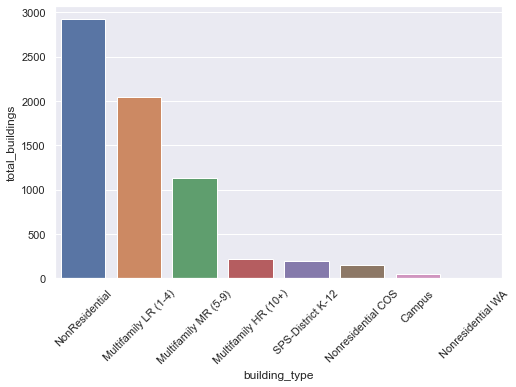

In [76]:
cat_data(data, "BuildingType", "building_type", "total_buildings")

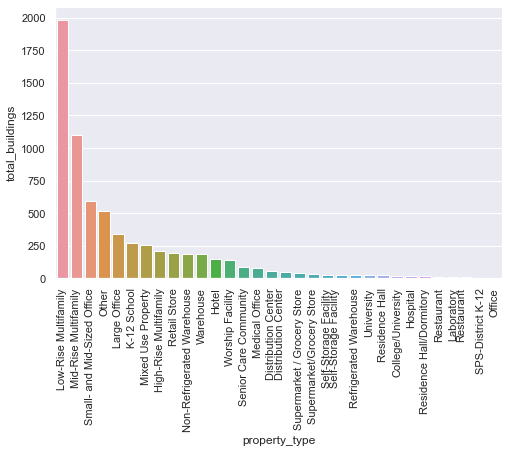

In [77]:
cat_data(data, "PrimaryPropertyType", "property_type", "total_buildings", rotation="90")

In [78]:
# Nous allons mettre les NaN dans la catégorie "other"
data["PrimaryPropertyType"].fillna("Other", inplace=True)
data["PrimaryPropertyType"].drop_duplicates().shape

(32,)

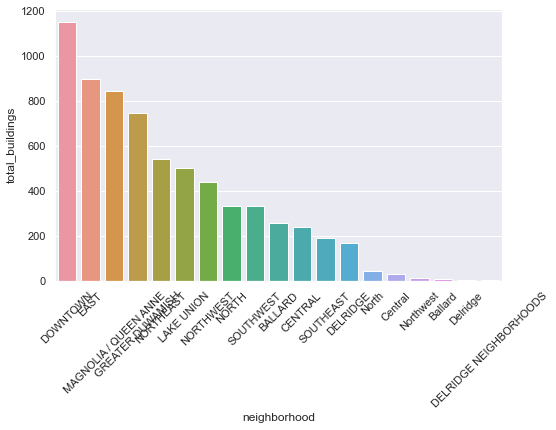

In [79]:
cat_data(data, "Neighborhood", "neighborhood", "total_buildings")

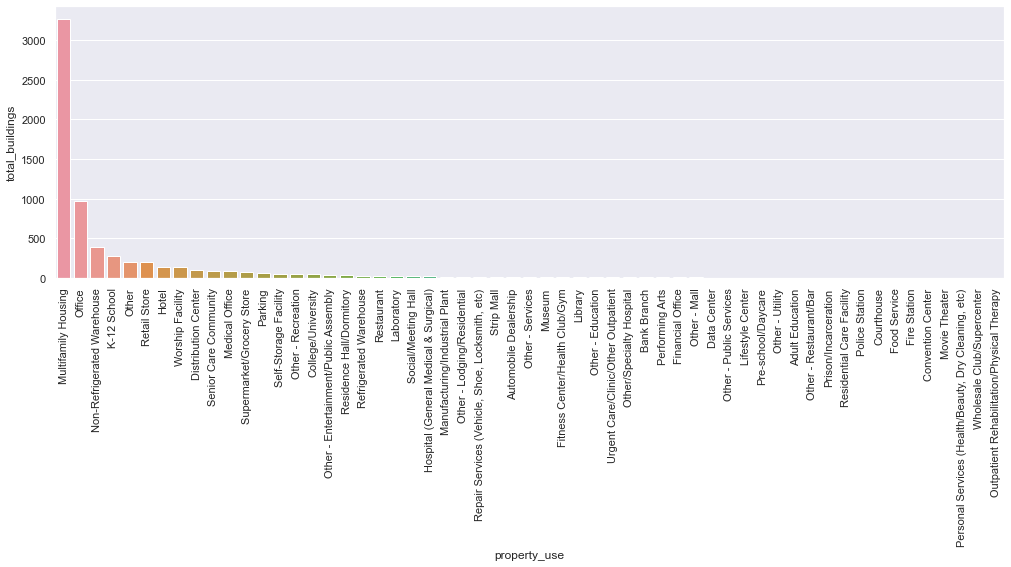

In [80]:
cat_data(data, "LargestPropertyUseType", "property_use", "total_buildings", rotation="90", figsize=(17,5))

In [81]:
# Nous allons mettre les NaN dans la catégorie "other"
data["LargestPropertyUseType"].fillna("Other", inplace=True)
data["LargestPropertyUseType"].drop_duplicates().shape

(57,)

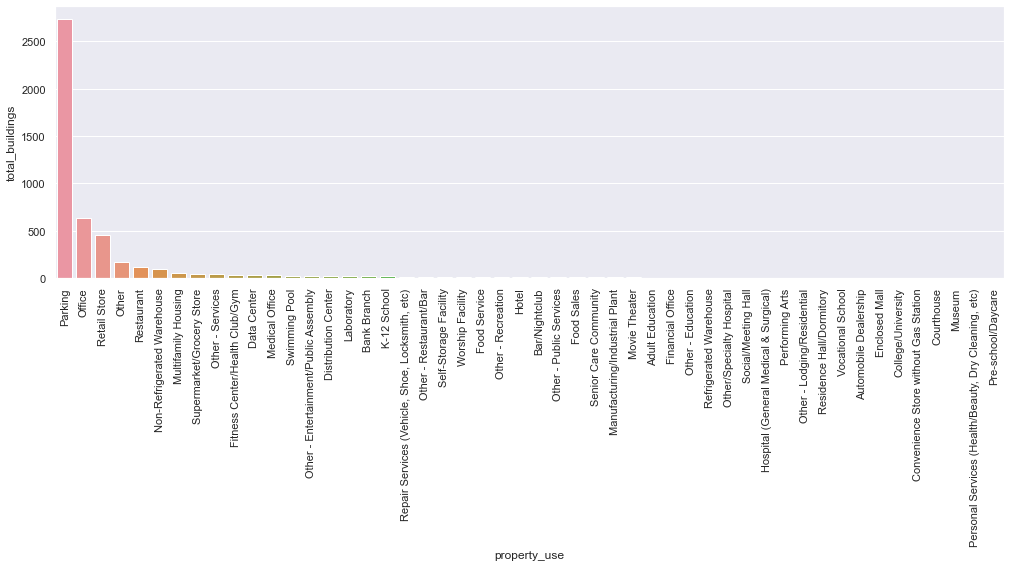

In [82]:
cat_data(data, "SecondLargestPropertyUseType", "property_use", "total_buildings", rotation="90", figsize=(17,5))

In [83]:
# Nous allons mettre les NaN dans la catégorie "other"
data["SecondLargestPropertyUseType"].fillna("Other", inplace=True)
data["SecondLargestPropertyUseType"].drop_duplicates().shape

(50,)

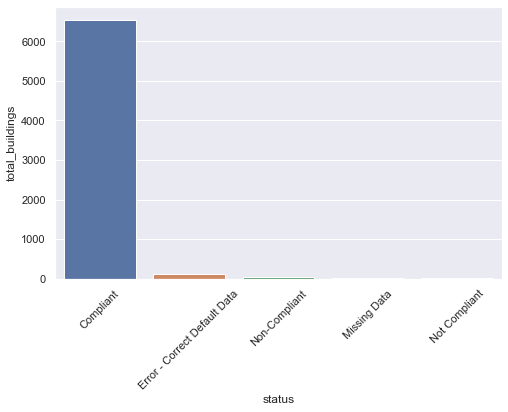

In [84]:
cat_data(data, "ComplianceStatus", "status", "total_buildings")

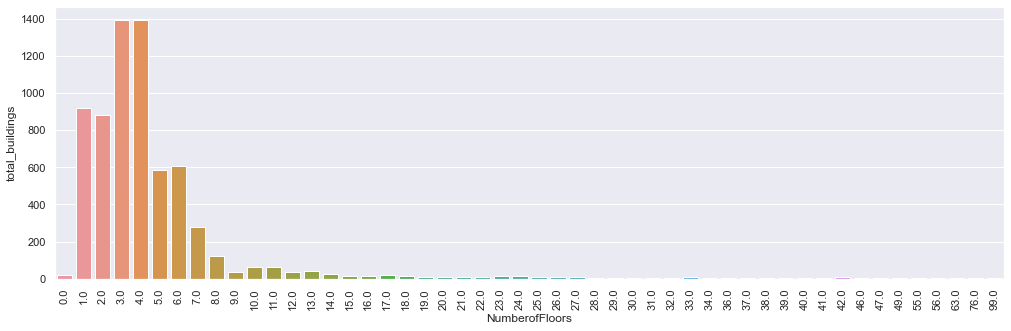

In [85]:
cat_data(data, "NumberofFloors", "NumberofFloors", "total_buildings", rotation="90", figsize=(17,5))

In [86]:
data["NumberofFloors"] = data["NumberofFloors"].apply(lambda x: 1 if (x == 0) else x)
data["NumberofFloors"].fillna(1, inplace=True)

In [87]:
# https://energystar-mesa.force.com/PortfolioManager/s/article/What-types-of-properties-are-Worship-Facilities-1600088540682
# les Worship-Facilities sont des batiments avec peu d'étages ( donc 99 est une abération...)
data["NumberofFloors"] = data["NumberofFloors"].apply(lambda x: 1 if (x == 99) else x)

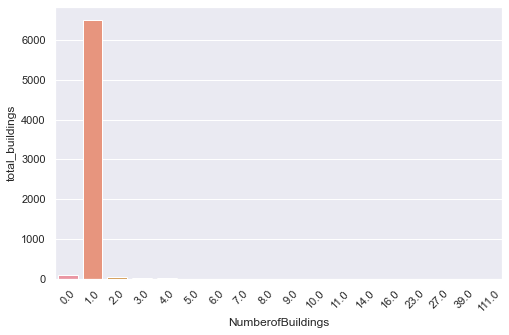

In [88]:
cat_data(data, "NumberofBuildings", "NumberofBuildings", "total_buildings")

In [89]:
# Avec % de Nan, nous allons remplir avec un fillna(median)
data['LargestPropertyUseTypeGFA'] = data['LargestPropertyUseTypeGFA'].fillna(data['LargestPropertyUseTypeGFA'].median())

In [90]:
# Avec % de Nan, nous allons remplir avec un fillna(mode)
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna(data['LargestPropertyUseType'].mode())

In [91]:
data['ENERGYSTARScore'] = data['ENERGYSTARScore'].fillna(data['ENERGYSTARScore'].median())

In [92]:
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(data['SecondLargestPropertyUseTypeGFA'].median())

## 1.6 suppression des données non pertinente et sans target

In [93]:
to_drop = ['OSEBuildingID', # non utilisé
                   'ComplianceStatus', # information non pertinente sur la complétude des données
                   'DefaultData', # variable inconnue non pertinente
                   'ZipCode', # latitude et longitude préférées
                   'NumberofBuildings', # non pertinent selon le graphique ci-dessus
                   'PropertyGFAParking' # bcp trop de batiment n'ont pas de parking
                  ]
data.drop(to_drop, axis=1, inplace=True)

In [94]:
data = data[~data["TotalGHGEmissions"].isna()]
data = data[~data["SiteEnergyUse(kBtu)"].isna()]
data = data[~data["LargestPropertyUseTypeGFA"].isna()]

In [95]:
# Sauvegarde de notre dataset avec les outliers pour tester notre modele plutart dans les 2 configurations (avec et sans)
data.to_csv('clean_dataset_with_outliers.csv',sep=',', index = True)

## 1.7 Choix des target et analyse + nettoyage outlier

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DataYear,6697.0,2.015503e+03,5.000297e-01,2015.00000,2015.00000,2.016000e+03,2.016000e+03,2.016000e+03
CouncilDistrictCode,6697.0,4.446170e+00,2.123813e+00,1.00000,3.00000,4.000000e+00,7.000000e+00,7.000000e+00
YearBuilt,6697.0,1.968123e+03,3.304042e+01,1900.00000,1948.00000,1.974000e+03,1.997000e+03,2.015000e+03
NumberofFloors,6697.0,4.670748e+00,5.230742e+00,1.00000,2.00000,4.000000e+00,5.000000e+00,7.600000e+01
PropertyGFABuilding(s),6697.0,8.341951e+04,1.735735e+05,-50550.00000,27273.00000,4.223900e+04,8.133600e+04,9.320156e+06
LargestPropertyUseTypeGFA,6697.0,7.630183e+04,1.665168e+05,5656.00000,25200.00000,3.953000e+04,7.207200e+04,9.320156e+06
SecondLargestPropertyUseTypeGFA,6697.0,2.211700e+04,4.538215e+04,0.00000,6829.00000,1.040000e+04,1.572400e+04,6.867500e+05
ENERGYSTARScore,6697.0,6.849694e+01,2.620294e+01,1.00000,54.00000,7.600000e+01,8.900000e+01,1.000000e+02
SiteEnergyUse(kBtu),6697.0,5.197298e+06,1.814157e+07,0.00000,920672.00000,1.791716e+06,4.135650e+06,8.739237e+08
TotalGHGEmissions,6697.0,1.149356e+02,4.788766e+02,-0.80000,9.45000,3.318000e+01,9.153000e+01,1.687098e+04


In [97]:
# SiteEnergyUse(kBtu)

In [98]:
data["SiteEnergyUse(kBtu)"].describe()

count    6.697000e+03
mean     5.197298e+06
std      1.814157e+07
min      0.000000e+00
25%      9.206720e+05
50%      1.791716e+06
75%      4.135650e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [99]:
# IQR * 1.5

In [100]:
(data["SiteEnergyUse(kBtu)"].quantile(0.75) - data["SiteEnergyUse(kBtu)"].quantile(0.25)) * 1.5

4822467.75

In [101]:
# Suppression valeur négative

In [102]:
data = data[data["SiteEnergyUse(kBtu)"] > 0]

In [103]:
# Distribution

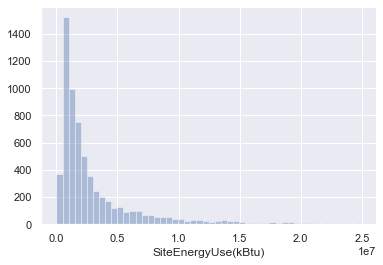

In [104]:
max = 2.5e7
data_wo_outliers = data[data["SiteEnergyUse(kBtu)"] < max]
ax = sns.distplot(data_wo_outliers["SiteEnergyUse(kBtu)"], kde=False)

In [105]:
print(data[data["SiteEnergyUse(kBtu)"] >= max].shape[0] / data.shape[0])
data = data[data["SiteEnergyUse(kBtu)"] < max]

0.03369776845888872


In [106]:
test = np.log(data['SiteEnergyUse(kBtu)'])
test1p = np.log1p(data['SiteEnergyUse(kBtu)'])
test2 = np.log2(data['SiteEnergyUse(kBtu)'])
test2p = np.log2(1+data['SiteEnergyUse(kBtu)'])

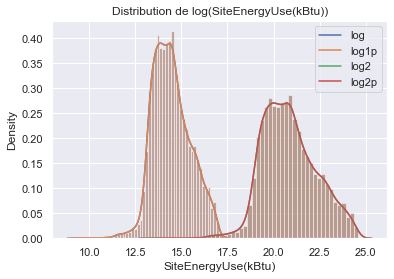

In [107]:
plt.title('Distribution de log(SiteEnergyUse(kBtu))')
sns.distplot(test)
sns.distplot(test1p)
sns.distplot(test2)
sns.distplot(test2p)
ax = plt.gca()
ax.legend(['log','log1p', 'log2', 'log2p'])

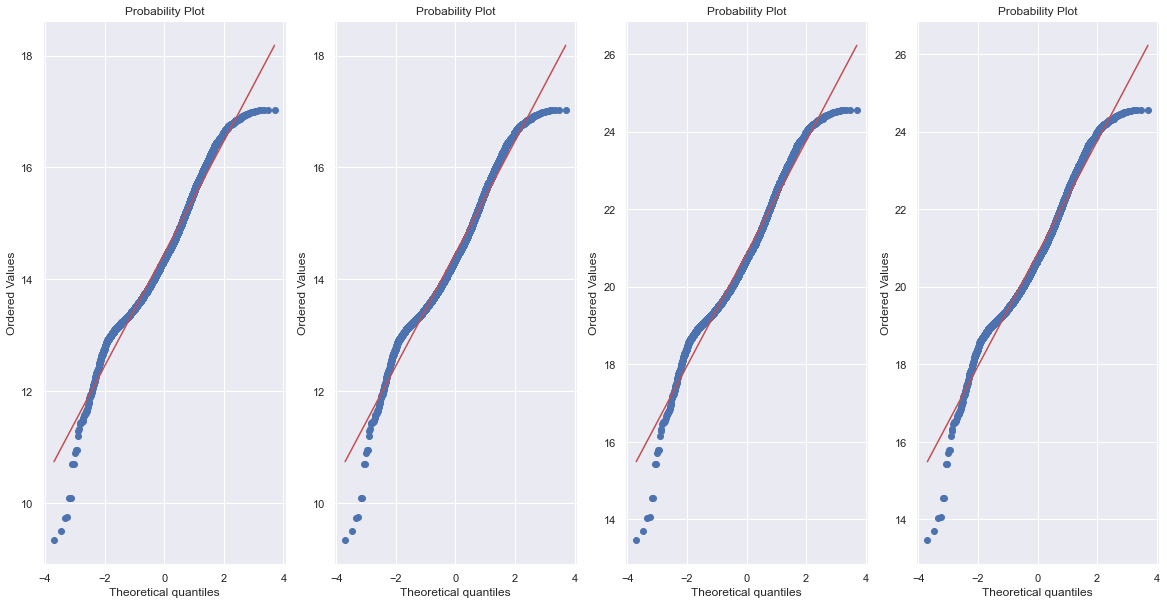

In [108]:
# Graph 1 variable fonction des effectifs
fig,axes = plt.subplots(ncols=4)
fig.set_size_inches(20, 10)
st.probplot(test, dist='norm', fit=True, plot=axes[0])
st.probplot(test1p, dist='norm', fit=True, plot=axes[1])
st.probplot(test2, dist='norm', fit=True, plot=axes[2])
st.probplot(test2p, dist='norm', fit=True, plot=axes[3])
plt.grid(True)

In [109]:
# data['Log2-SiteEnergyUseWN(kBtu)'] = test2p

In [110]:
# TotalGHGEmissions

In [111]:
data["TotalGHGEmissions"].describe()

count    6452.000000
mean     69.577601  
std      103.932549 
min     -0.800000   
25%      8.987500   
50%      30.780000  
75%      80.357500  
max      977.730000 
Name: TotalGHGEmissions, dtype: float64

In [112]:
# IQR * 1.5

In [113]:
(data["TotalGHGEmissions"].quantile(0.75) - data["TotalGHGEmissions"].quantile(0.25)) * 1.5

107.05499999999998

In [114]:
# Suppression valeur négative

In [115]:
data = data[data["TotalGHGEmissions"] >= 0]

In [116]:
# Distribution

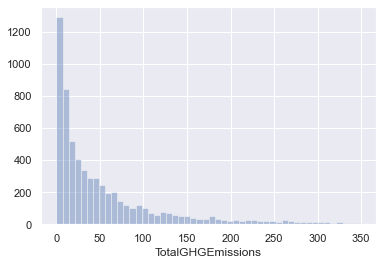

In [117]:
max = 350
data_wo_outliers = data[data["TotalGHGEmissions"] < max]
ax = sns.distplot(data_wo_outliers["TotalGHGEmissions"], kde=False)

In [118]:
print(data[data["TotalGHGEmissions"] >= max].shape[0] / data.shape[0])
data = data[data["TotalGHGEmissions"] < max]

0.03162300418539761


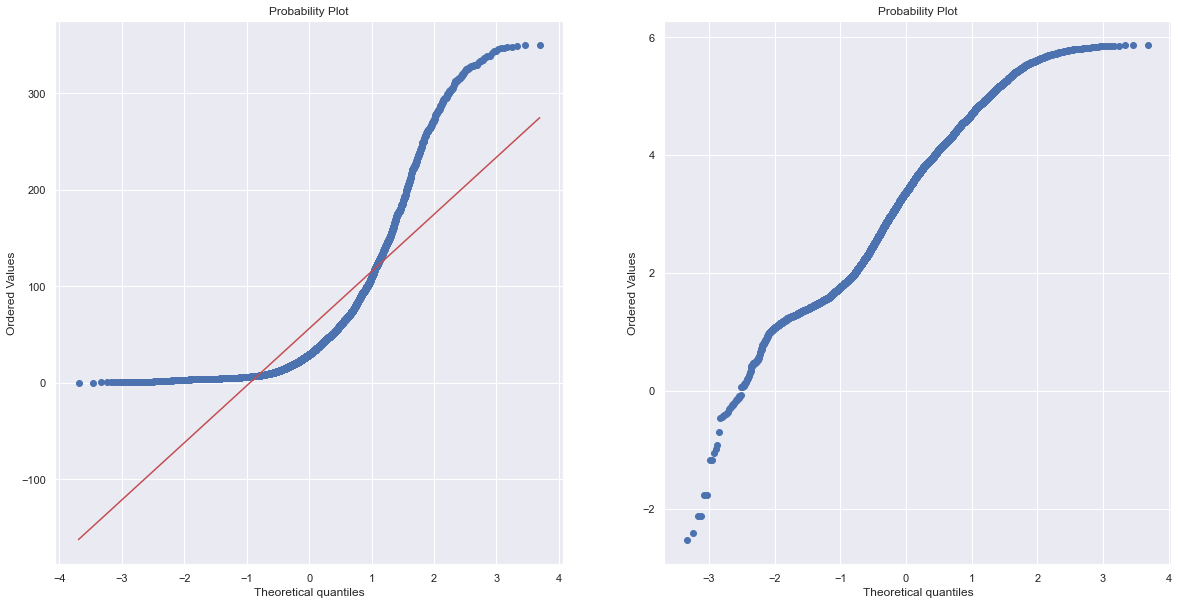

In [119]:
# Graph 1 variable fonction des effectifs
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
st.probplot(data["TotalGHGEmissions"], dist='norm', fit=True, plot=axes[0])
st.probplot(np.log(data["TotalGHGEmissions"]), dist='norm', fit=True, plot=axes[1])
plt.grid(True)

In [120]:
# data['Log2-TotalGHGEmissions'] = test2p

In [121]:
# LargestPropertyUseTypeGFA

In [122]:
data["LargestPropertyUseTypeGFA"].describe()

count    6247.000000  
mean     57003.462622 
std      57648.668319 
min      5656.000000  
25%      24703.500000 
50%      37618.000000 
75%      63596.500000 
max      889981.000000
Name: LargestPropertyUseTypeGFA, dtype: float64

In [123]:
# IQR * 1.5

In [124]:
(data["LargestPropertyUseTypeGFA"].quantile(0.75) - data["LargestPropertyUseTypeGFA"].quantile(0.25)) * 1.5

58339.5

In [125]:
# Suppression valeur négative

In [126]:
data = data[data["LargestPropertyUseTypeGFA"] >= 0]

In [127]:
# Distribution

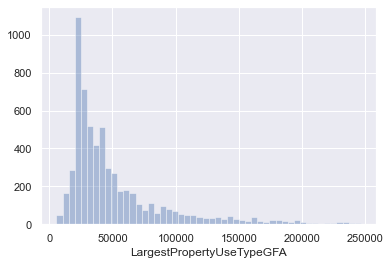

In [128]:
max = 250000
data_wo_outliers = data[data["LargestPropertyUseTypeGFA"] < max]
ax = sns.distplot(data_wo_outliers["LargestPropertyUseTypeGFA"], kde=False)

In [129]:
print(data[data["LargestPropertyUseTypeGFA"] >= max].shape[0] / data.shape[0])
data = data[data["LargestPropertyUseTypeGFA"] < max]

0.018568913078277575


In [130]:
test_ter = np.log(data['LargestPropertyUseTypeGFA'])
test1p_ter = np.log1p(data['LargestPropertyUseTypeGFA'])
test2_ter = np.log2(data['LargestPropertyUseTypeGFA'])
test2p_ter = np.log2(data['LargestPropertyUseTypeGFA'])

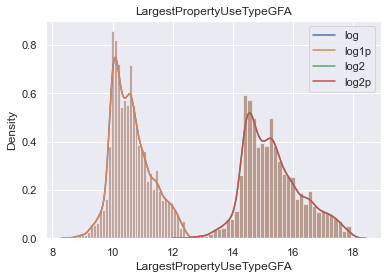

In [131]:
plt.title('LargestPropertyUseTypeGFA')
sns.distplot(test_ter)
sns.distplot(test1p_ter)
sns.distplot(test2_ter)
sns.distplot(test2p_ter)
ax = plt.gca()
ax.legend(['log','log1p', 'log2', 'log2p'])

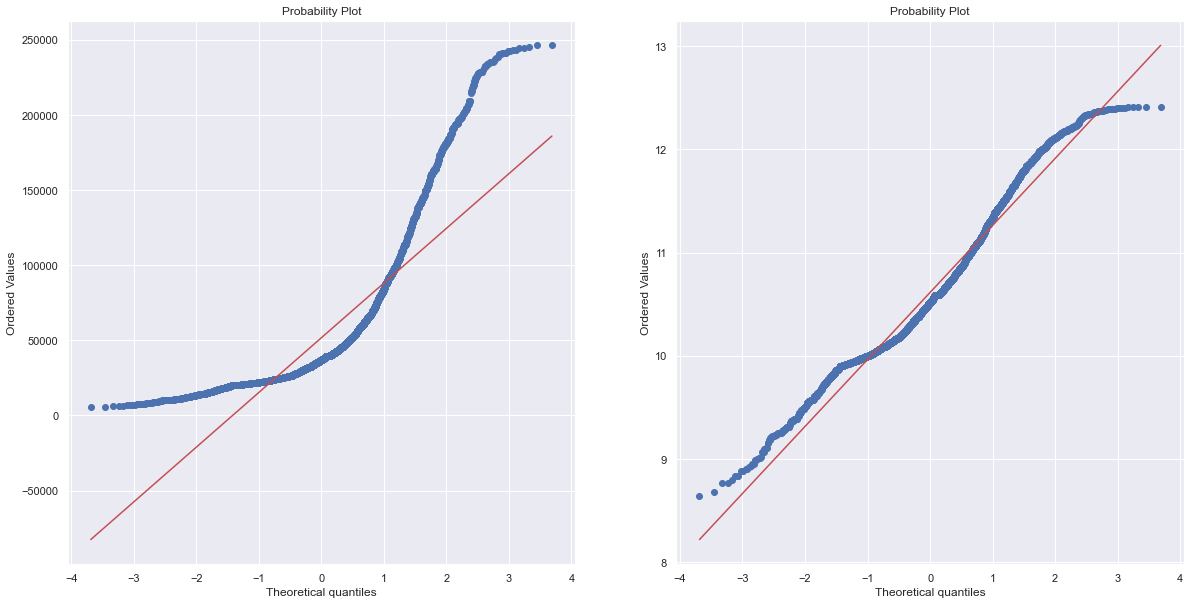

In [132]:
# Graph 1 variable fonction des effectifs
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
st.probplot(data["LargestPropertyUseTypeGFA"], dist='norm', fit=True, plot=axes[0])
st.probplot(np.log(data["LargestPropertyUseTypeGFA"]), dist='norm', fit=True, plot=axes[1])
plt.grid(True)

## SiteEnergyUse(kBtu) vs TotalGHGEmission

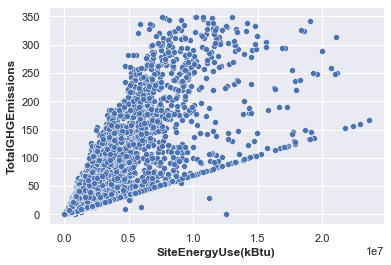

In [133]:
sns.scatterplot(data=data, x="SiteEnergyUse(kBtu)", y="TotalGHGEmissions");
plt.xlabel("SiteEnergyUse(kBtu)", fontweight="bold")
plt.ylabel("TotalGHGEmissions", fontweight="bold")
plt.show()

### LargestPropertyUseTypeGFA vs SiteEnergyUse(kBtu) 

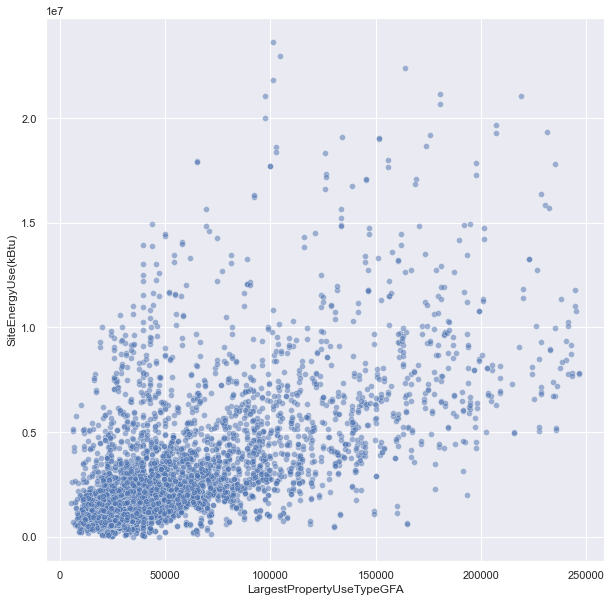

In [134]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="LargestPropertyUseTypeGFA", y="SiteEnergyUse(kBtu)", data=data, alpha=0.5)
plt.show()

In [135]:
pd.DataFrame(data.isna().sum() / len(data)*100).sort_values(by=0, ascending=False)

,0
DataYear,0.0
BuildingType,0.0
Longitude,0.0
Latitude,0.0
TotalGHGEmissions,0.0
SiteEnergyUse(kBtu),0.0
ENERGYSTARScore,0.0
SecondLargestPropertyUseTypeGFA,0.0
SecondLargestPropertyUseType,0.0
LargestPropertyUseTypeGFA,0.0


In [136]:
# Transformation logarithmique
data['Log2_SiteEnergyUse(kBtu)'] = np.log(data['SiteEnergyUse(kBtu)'] + 1) # +1 pour éviter les valeurs nulles
data['Log2_TotalGHGEmissions'] = np.log(data['TotalGHGEmissions'] + 1) # +1 pour éviter les valeurs nulles
data['Log2_LargestPropertyUseTypeGFA'] = np.log(data['LargestPropertyUseTypeGFA'] + 1) # +1 pour éviter les valeurs nulles

In [137]:
data.to_csv('clean_dataset.csv',sep=',', index = True)

In [138]:
data.isna().sum()

DataYear                           0
BuildingType                       0
PrimaryPropertyType                0
CouncilDistrictCode                0
Neighborhood                       0
YearBuilt                          0
NumberofFloors                     0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ENERGYSTARScore                    0
SiteEnergyUse(kBtu)                0
TotalGHGEmissions                  0
Latitude                           0
Longitude                          0
Address                            0
Log2_SiteEnergyUse(kBtu)           0
Log2_TotalGHGEmissions             0
Log2_LargestPropertyUseTypeGFA     0
dtype: int64